# Accuracy Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from copy import deepcopy

In [2]:
sim_path = '../../results/synth_classification_fixed_dataset_and_samples_v2/23-08-2023-10:00'

In [3]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

runs_dirs = get_immediate_subdirectories(sim_path)
runs_dirs.sort()

In [4]:
# runs_dirs = ['1']

In [5]:
pre_AL_accuracy = {}
clairvoyant_final_accuracy = {}
concept_list_dict = {}
test_set = {}
weights = {}
metadata = {}

weighted_sampling_accuracy = {}
random_sampling_accuracy = {}
clairvoyant_accuracy = {}

weighted_sampling_scores = {}

ws_selected_samples = {}
rs_selected_samples = {}

ws_relabeled_samples = {}
rs_relabeled_samples = {}

STRATEGIES = [
    "WeightedSampling",
    "RandomSamplingV2",
    "clairvoyant"
]

for run in runs_dirs:

    with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
        metadata[run] = json.load(f)

    run_path = sim_path + '/' + run + '/'

    concept_list_dict[run] = []

    test_set[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'test_set.csv',
        dtype='str'
    ).astype('float64')

    weights[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'weights.csv',
        dtype='str'
    ).astype('float64')

    for n in range(metadata[run]['n_concepts']):

        # noinspection PyTypeChecker
        concept_list_dict[run].append(pd.read_csv(
            filepath_or_buffer=run_path + 'concept_' + str(n) + '.csv',
            dtype='str'
        ).astype('float64'))

    pre_AL_accuracy[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'pre_AL_accuracy.csv',
        dtype='str',
        header=None
    ).astype('float64').iloc[0, 0]

    clairvoyant_final_accuracy[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'clairvoyant_final_accuracy.csv',
        dtype='str',
        header=None
    ).astype('float64').iloc[0, 0]

    weighted_sampling_accuracy[run] = {}
    random_sampling_accuracy[run] = {}
    clairvoyant_accuracy[run] = {}
    
    weighted_sampling_scores[run] = {}

    for strategy in STRATEGIES:

        strategy_path = run_path + strategy

        if strategy == 'WeightedSampling':

            ws_selected_samples[run] = pd.read_csv(
                filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                dtype='str'
            ).astype('float64')
            
            ws_relabeled_samples[run] = pd.read_csv(
                filepath_or_buffer=strategy_path + '/' + 'relabeled_samples.csv',
                dtype='str'
            ).astype('float64')

        elif strategy == 'RandomSamplingV2':
            rs_selected_samples[run] = pd.read_csv(
                filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                dtype='str'
            ).astype('float64')
            
            rs_relabeled_samples[run] = pd.read_csv(
                filepath_or_buffer=strategy_path + '/' + 'relabeled_samples.csv',
                dtype='str'
            ).astype('float64')

        for n in range(metadata[run]['n_samples']):
            n_sample = n + 1

            sample_path = strategy_path + '/' + str(n_sample) + '_samples.csv'

            if strategy == "WeightedSampling":
                weighted_sampling_accuracy[run][n_sample] = pd.read_csv(
                    filepath_or_buffer=sample_path,
                    dtype='str',
                    header=None
                ).astype('float64').iloc[0, 0]
                
                # score_path = strategy_path + '/' + str(n_sample) + '_score.csv'
                #     
                # weighted_sampling_scores[run][n_sample] = pd.read_csv(
                #     filepath_or_buffer=score_path,
                #     dtype='str',
                #     index_col=0,
                #     header=None
                # ).astype('float64')

            elif strategy == "RandomSamplingV2":
                random_sampling_accuracy[run][n_sample] = pd.read_csv(
                    filepath_or_buffer=sample_path,
                    dtype='str',
                    header=None
                ).astype('float64').iloc[0, 0]

            elif strategy == "clairvoyant":
                clairvoyant_accuracy[run][n_sample] = pd.read_csv(
                    filepath_or_buffer=sample_path,
                    dtype='str',
                    header=None
                ).astype('float64').iloc[0, 0]

In [6]:
def load_data(run_dirs):
    pre_AL_accuracy = {}
    clairvoyant_final_accuracy = {}
    concept_list_dict = {}
    test_set = {}
    weights = {}
    metadata = {}

    weighted_sampling_accuracy = {}
    random_sampling_accuracy = {}
    clairvoyant_accuracy = {}
    
    weighted_sampling_scores = {}

    ws_selected_samples = {}
    rs_selected_samples = {}

    STRATEGIES = [
        "WeightedSampling",
        "RandomSamplingV2",
        "clairvoyant"
    ]

    for run in runs_dirs:

        with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
            metadata[run] = json.load(f)

        run_path = sim_path + '/' + run + '/'

        concept_list_dict[run] = []

        test_set[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'test_set.csv',
            dtype='str'
        ).astype('float64')

        weights[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'weights.csv',
            dtype='str'
        ).astype('float64')

        for n in range(metadata[run]['n_concepts']):

            # noinspection PyTypeChecker
            concept_list_dict[run].append(pd.read_csv(
                filepath_or_buffer=run_path + 'concept_' + str(n) + '.csv',
                dtype='str'
            ).astype('float64'))

        pre_AL_accuracy[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'pre_AL_accuracy.csv',
            dtype='str',
            header=None
        ).astype('float64').iloc[0, 0]

        clairvoyant_final_accuracy[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'clairvoyant_final_accuracy.csv',
            dtype='str',
            header=None
        ).astype('float64').iloc[0, 0]

        weighted_sampling_accuracy[run] = {}
        random_sampling_accuracy[run] = {}
        clairvoyant_accuracy[run] = {}
        
        weighted_sampling_scores[run] = {}

        for strategy in STRATEGIES:

            strategy_path = run_path + strategy

            if strategy == 'WeightedSampling':

                ws_selected_samples[run] = pd.read_csv(
                    filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                    dtype='str'
                ).astype('float64')

            elif strategy == 'RandomSamplingV2':
                rs_selected_samples[run] = pd.read_csv(
                    filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                    dtype='str'
                ).astype('float64')

            for n in range(metadata[run]['n_samples']):
                n_sample = n + 1

                sample_path = strategy_path + '/' + str(n_sample) + '_samples.csv'

                if strategy == "WeightedSampling":
                    weighted_sampling_accuracy[run][n_sample] = pd.read_csv(
                        filepath_or_buffer=sample_path,
                        dtype='str',
                        header=None
                    ).astype('float64').iloc[0, 0]
                    
                    score_path = strategy_path + '/' + str(n_sample) + '_score.csv'
                    
                    weighted_sampling_scores[run][n_sample] = pd.read_csv(
                        filepath_or_buffer=score_path,
                        dtype='str',
                        header=None
                    ).astype('float64')

                elif strategy == "RandomSamplingV2":
                    random_sampling_accuracy[run][n_sample] = pd.read_csv(
                        filepath_or_buffer=sample_path,
                        dtype='str',
                        header=None
                    ).astype('float64').iloc[0, 0]

                elif strategy == "clairvoyant":
                    clairvoyant_accuracy[run][n_sample] = pd.read_csv(
                        filepath_or_buffer=sample_path,
                        dtype='str',
                        header=None
                    ).astype('float64').iloc[0, 0]
    return pre_AL_accuracy, clairvoyant_final_accuracy, concept_list_dict, test_set, weights, metadata, weighted_sampling_accuracy, random_sampling_accuracy, clairvoyant_accuracy, ws_selected_samples, rs_selected_samples

In [7]:
import matplotlib.colors as mcolors

color_cycle = mcolors.TABLEAU_COLORS  # You can choose any color set here
color_names = list(color_cycle.keys())

n_classes = metadata[runs_dirs[0]]['n_classes']

color_list = [color_cycle[color_names[i]] for i in range(n_classes)]

### Plot Concepts

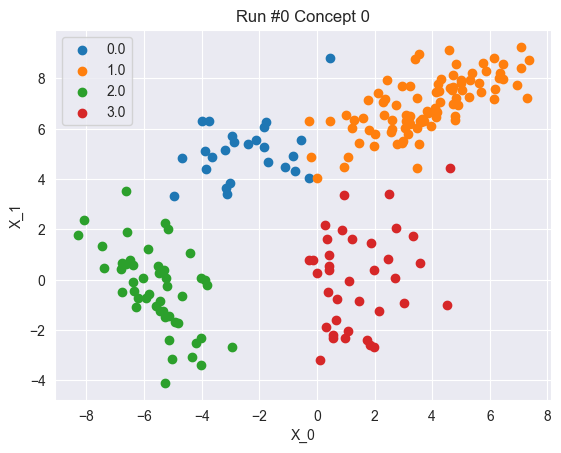

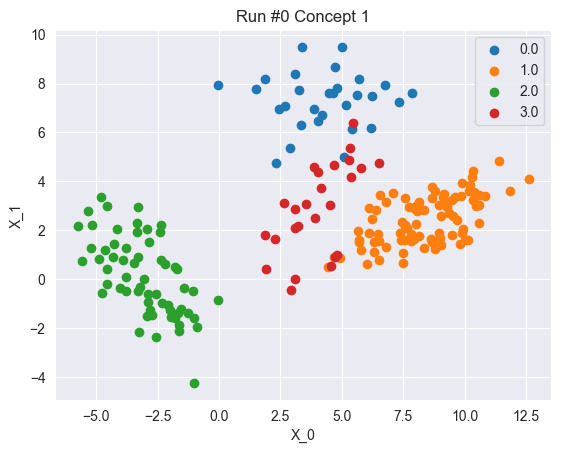

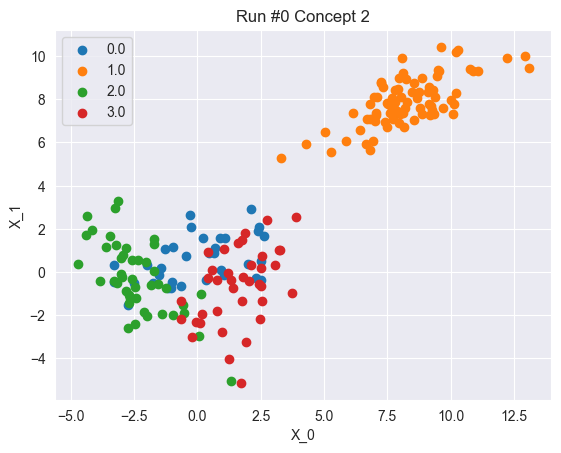

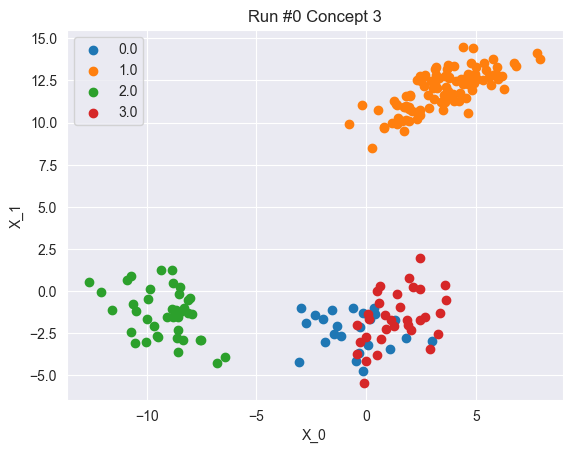

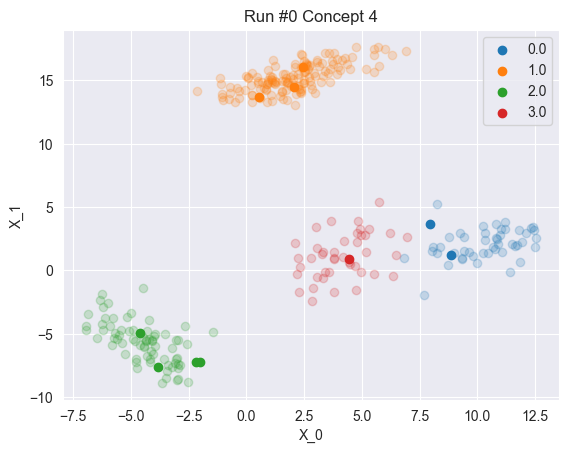

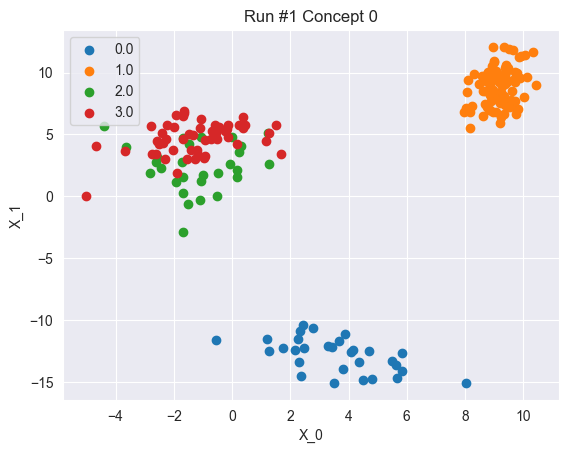

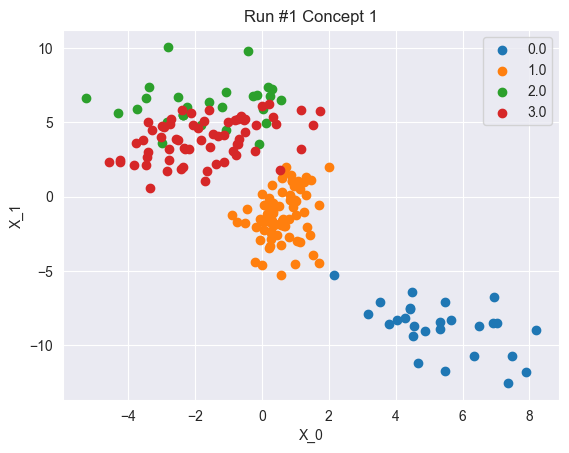

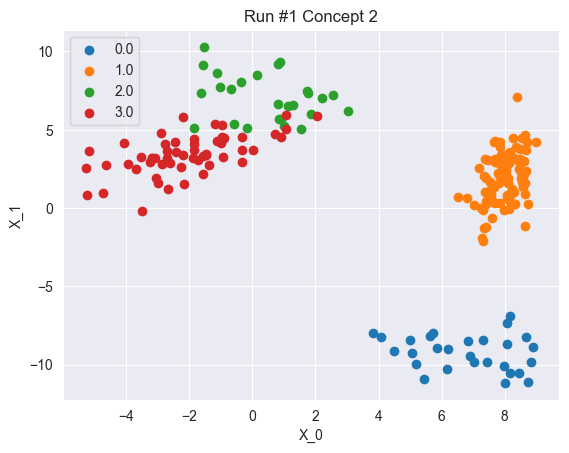

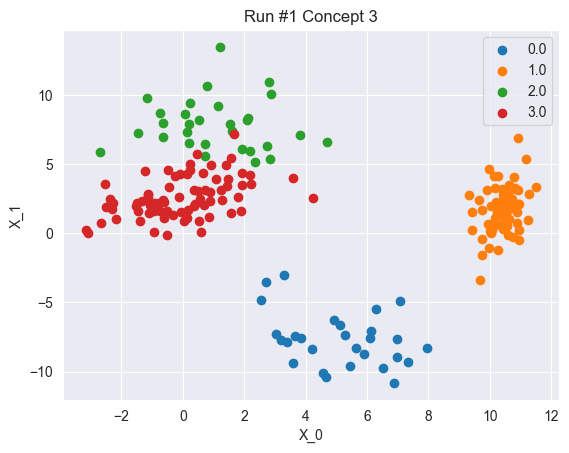

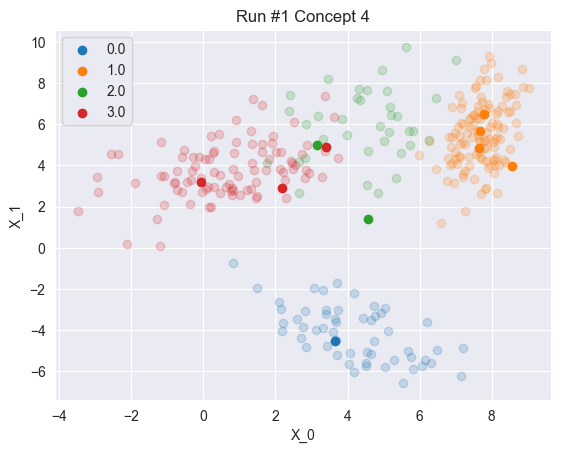

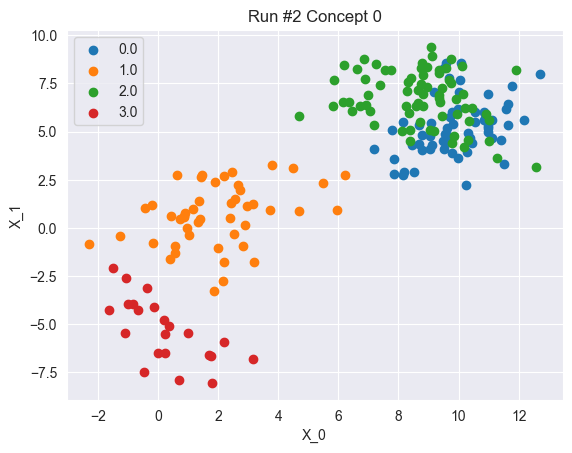

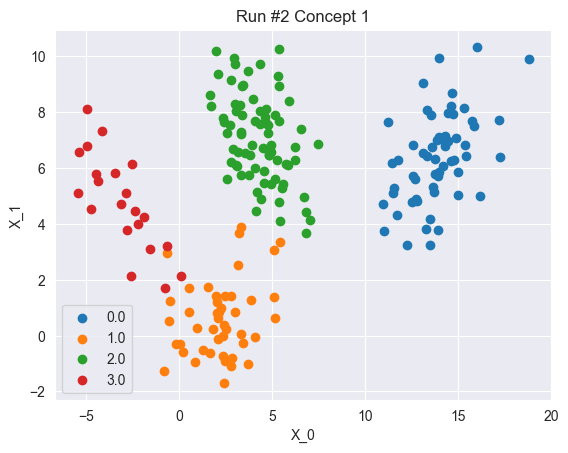

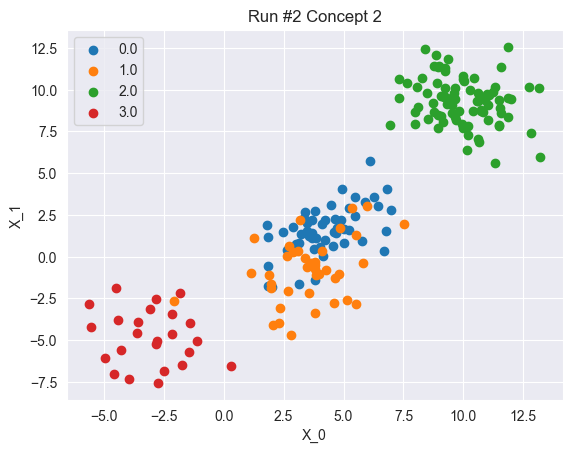

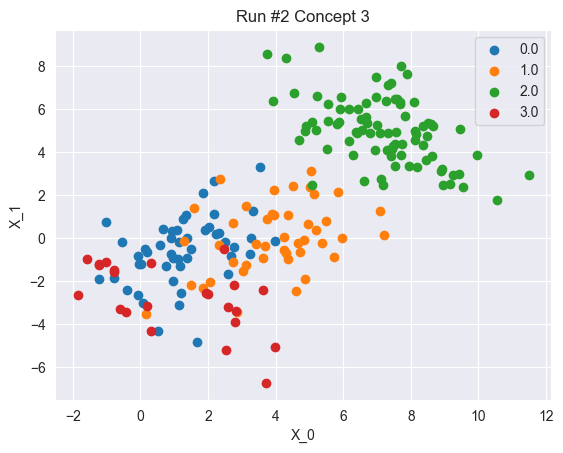

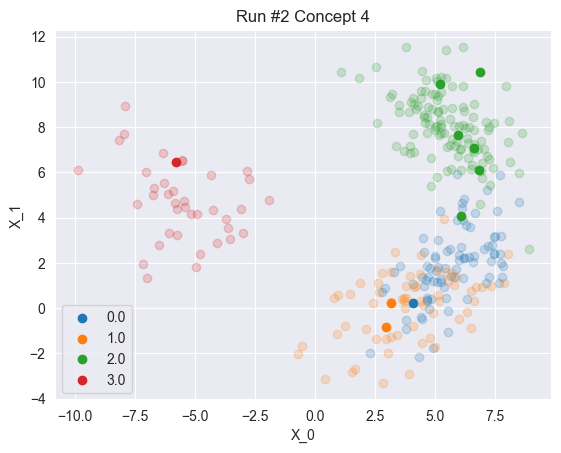

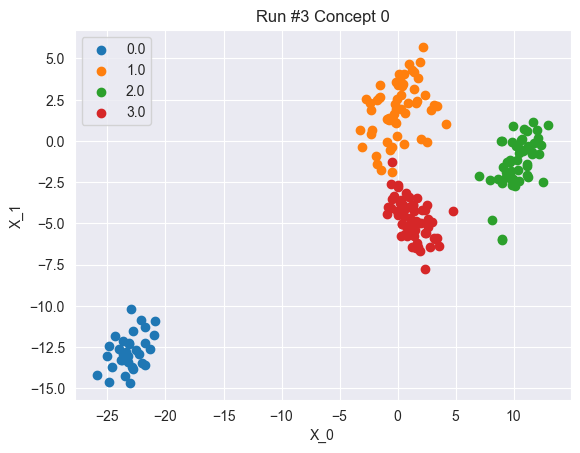

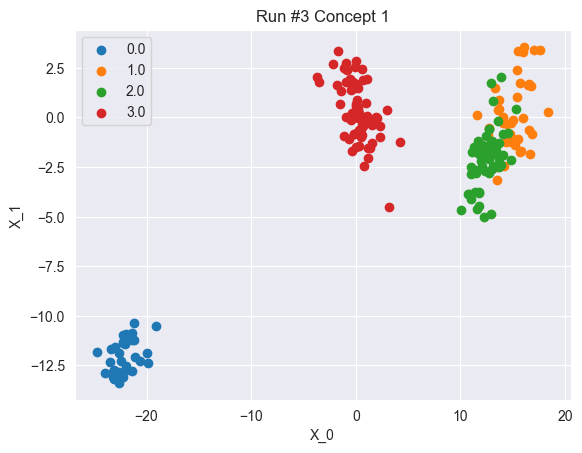

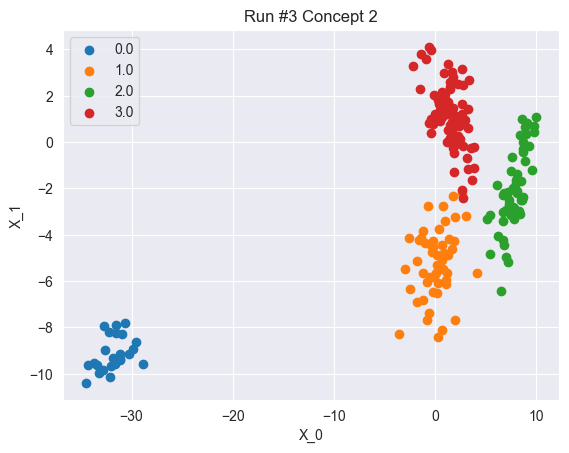

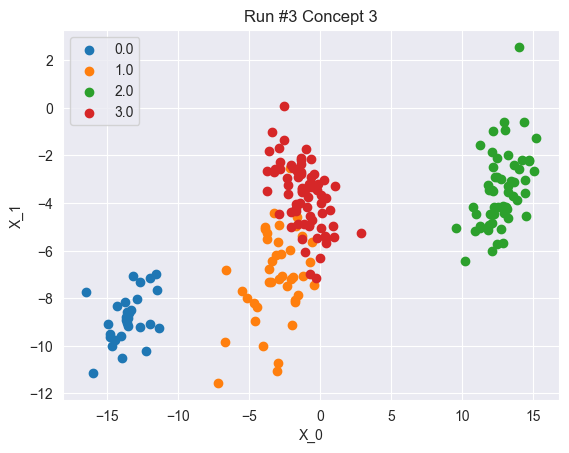

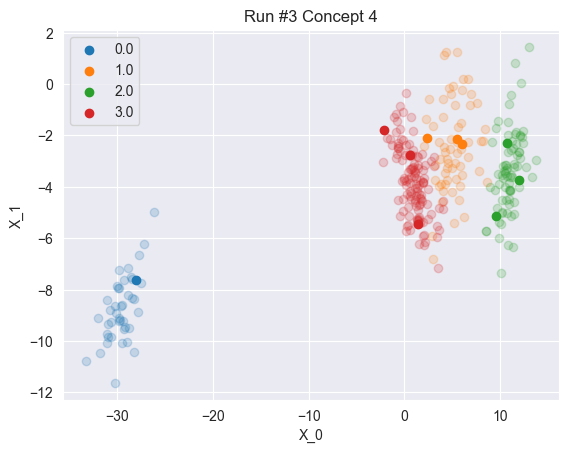

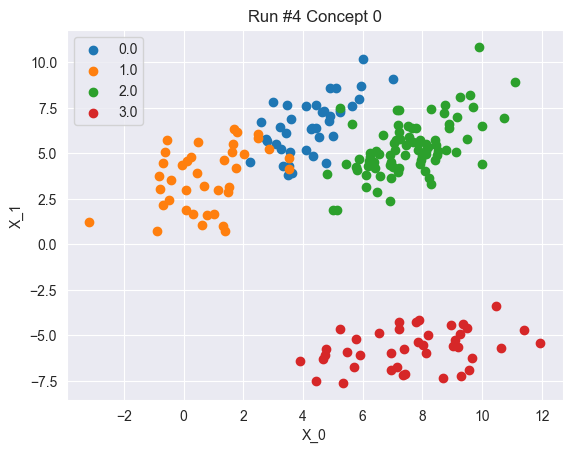

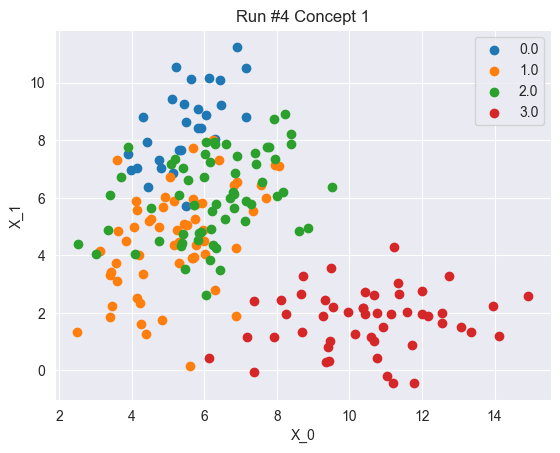

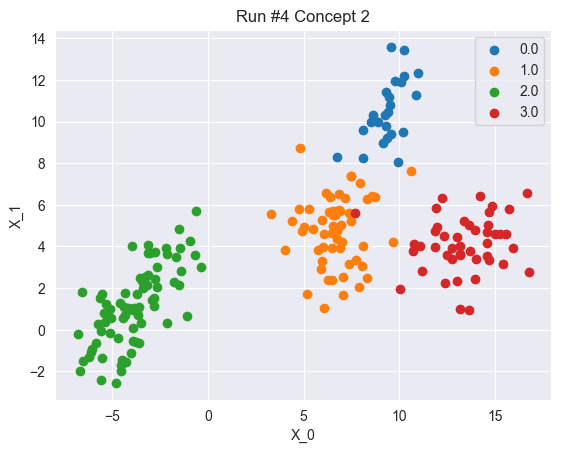

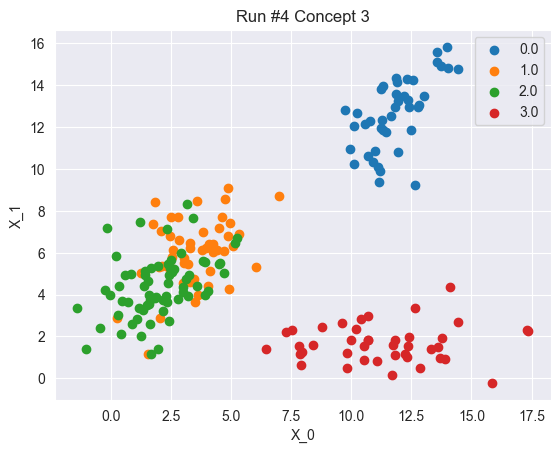

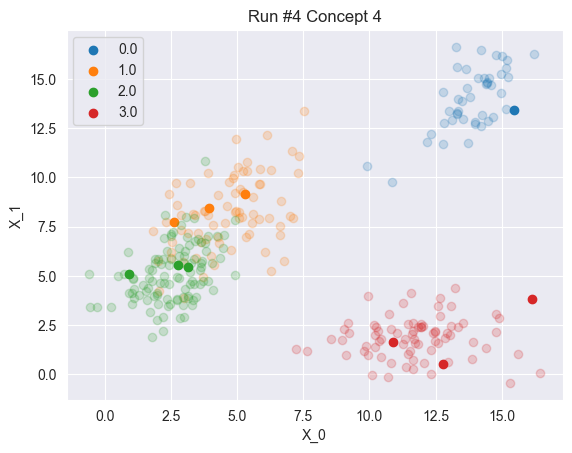

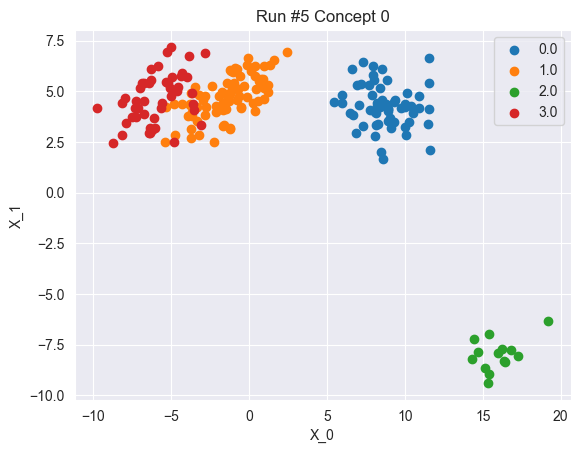

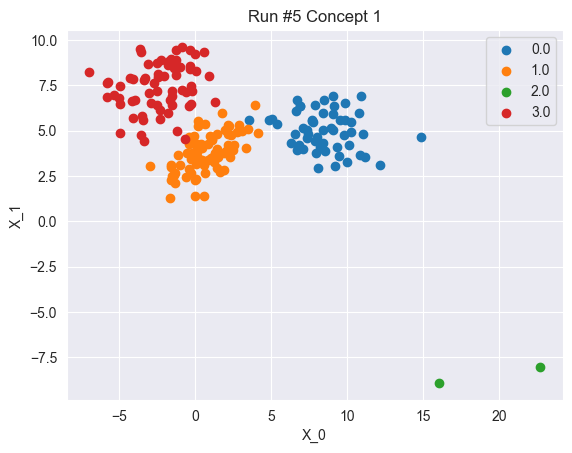

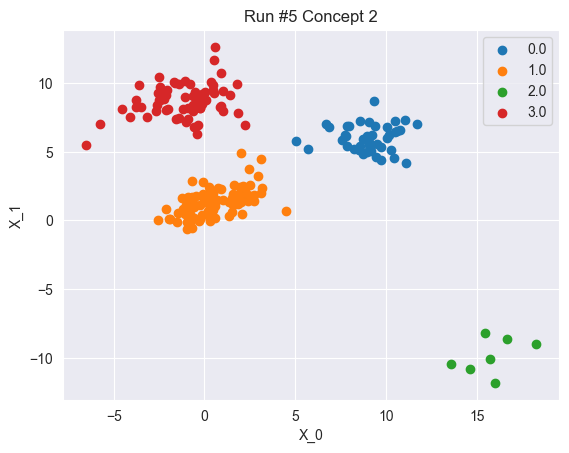

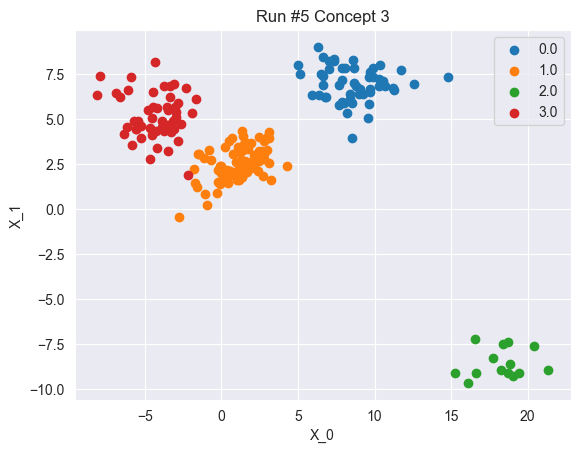

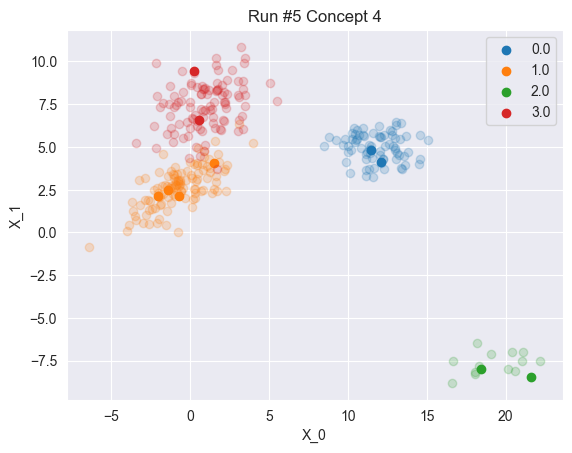

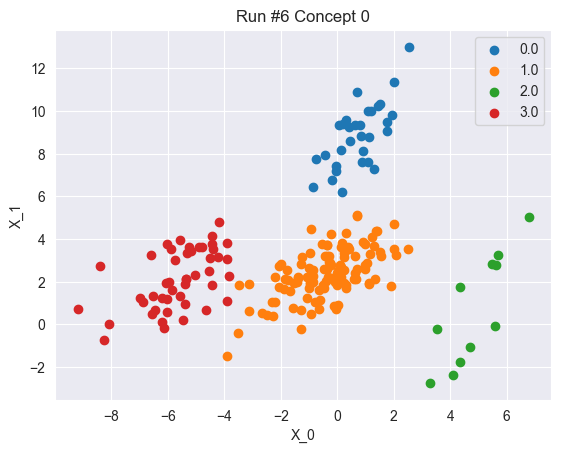

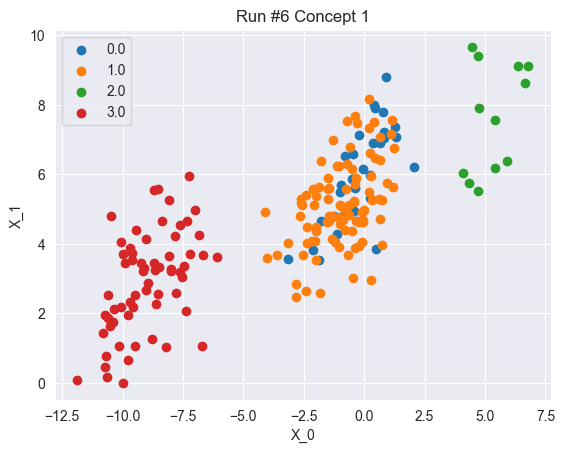

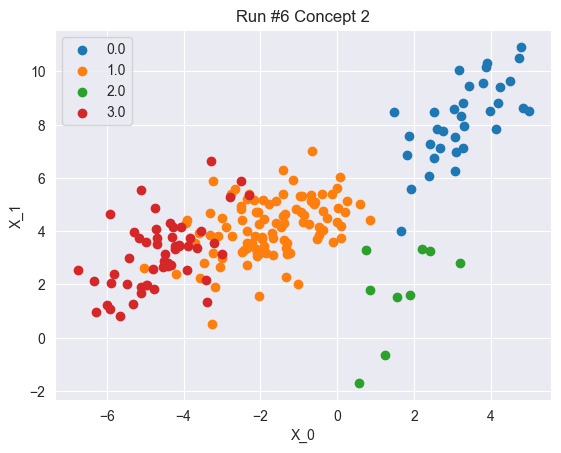

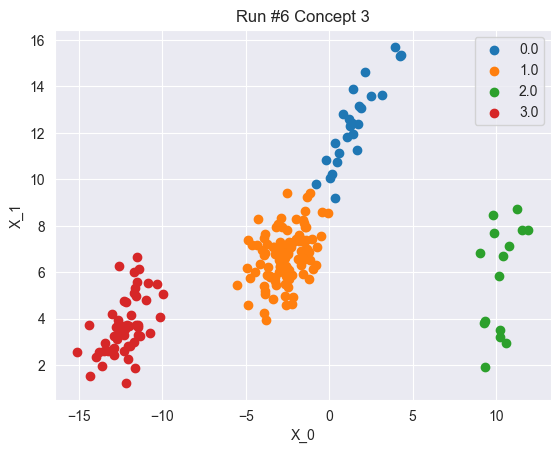

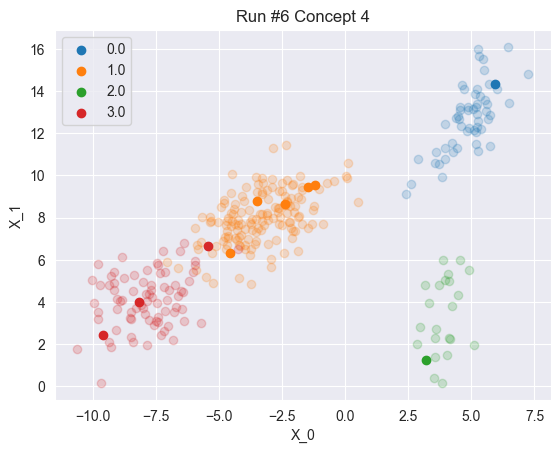

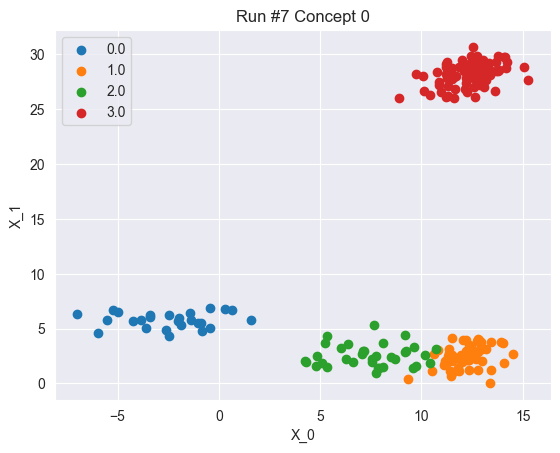

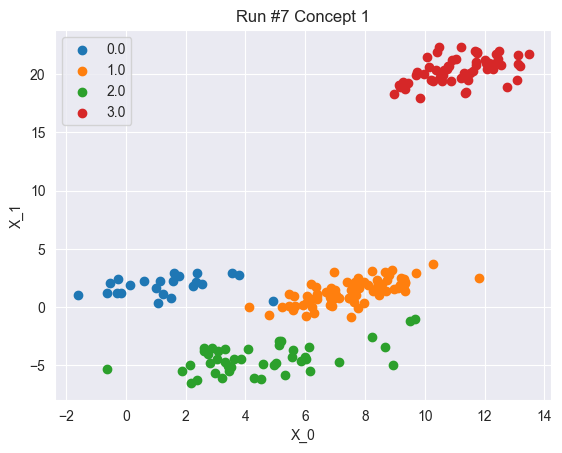

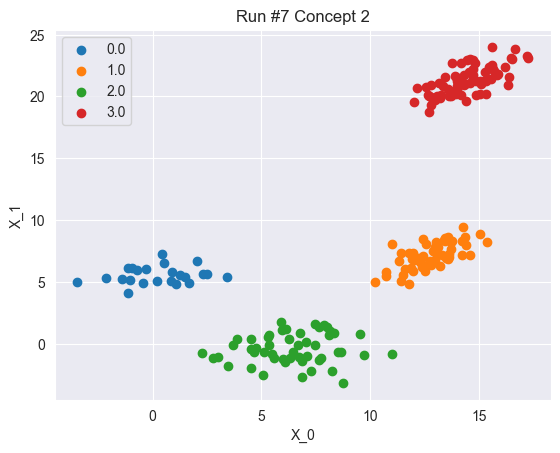

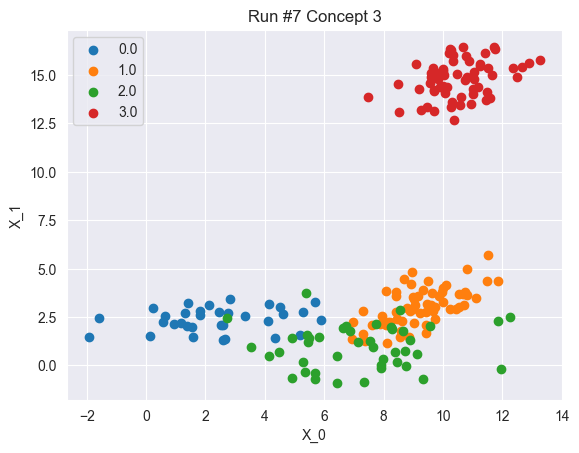

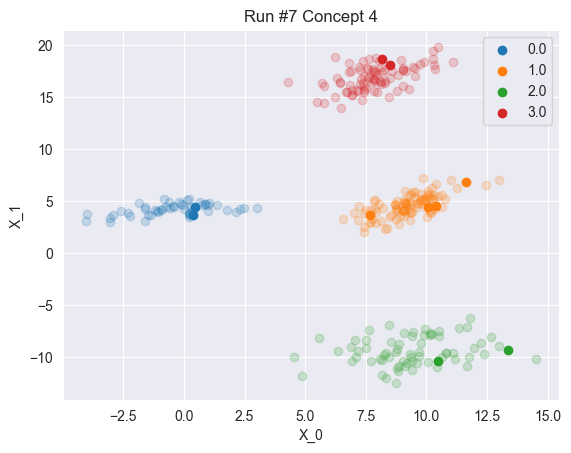

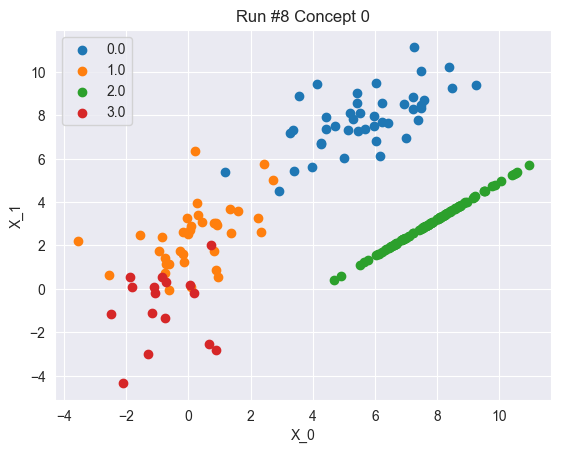

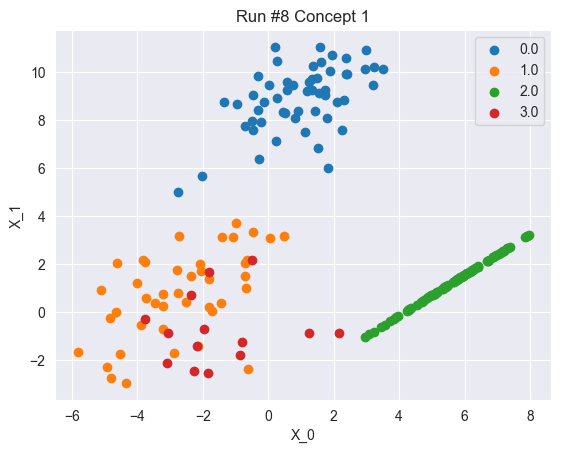

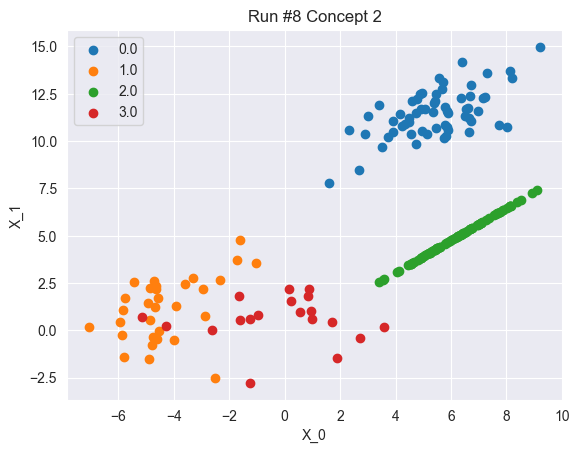

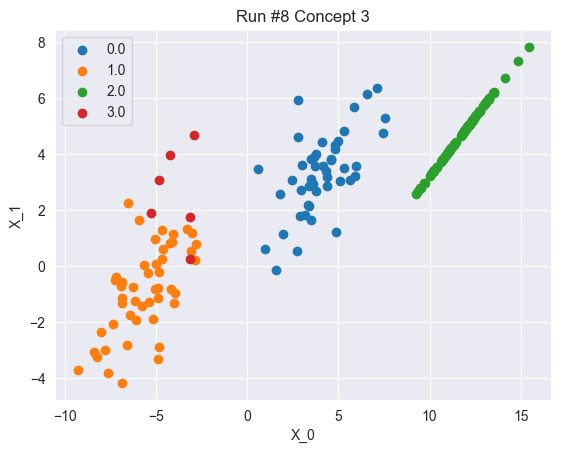

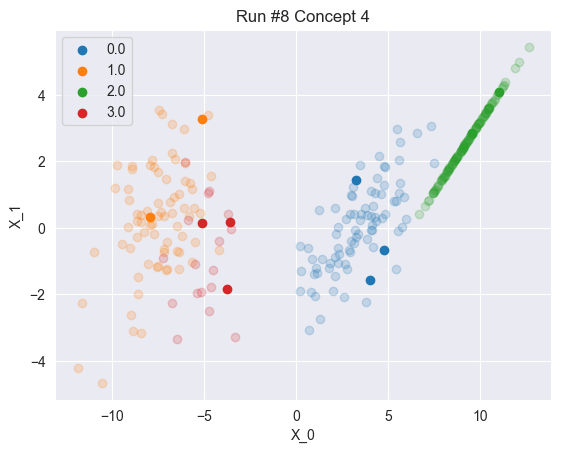

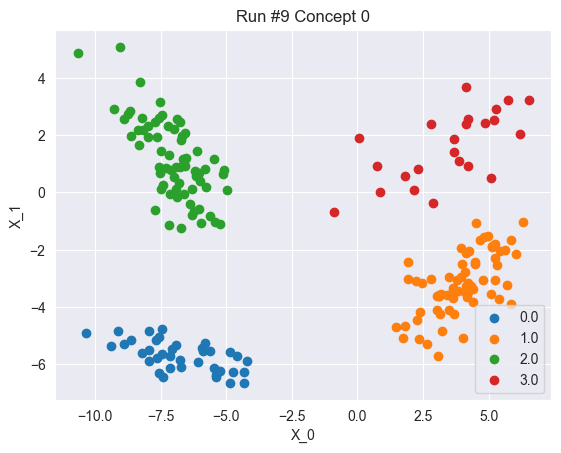

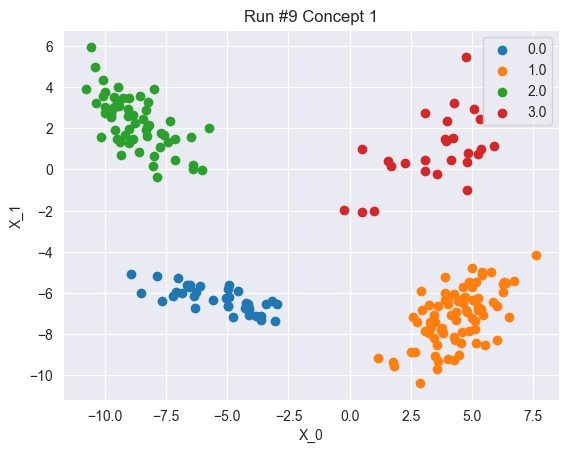

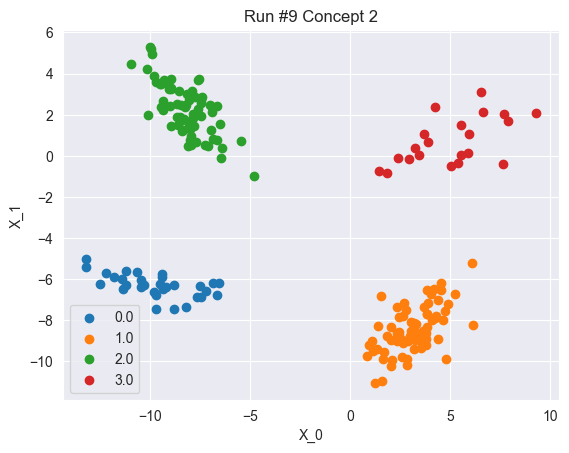

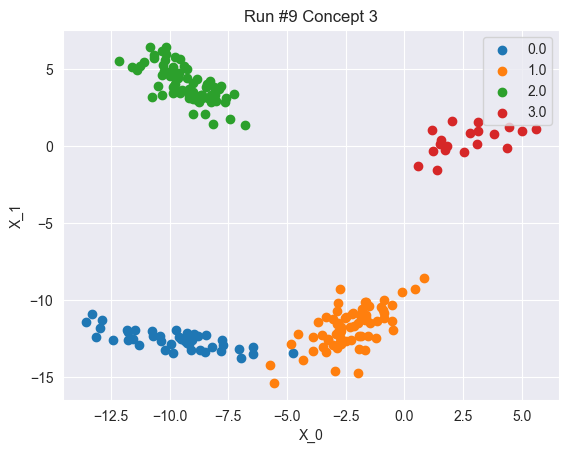

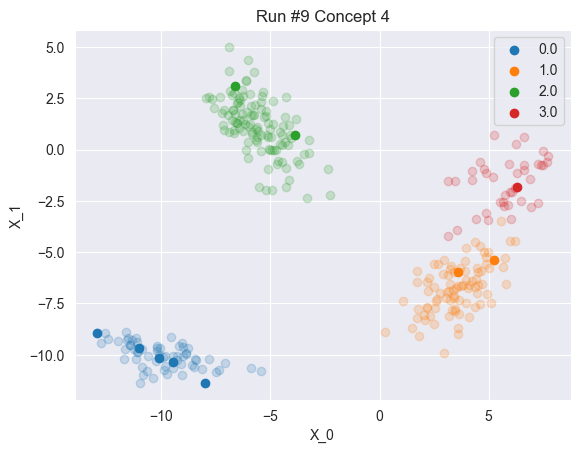

In [8]:
# %%script false --no-raise-error

for (run, concept_list) in concept_list_dict.items():
    for index,concept in enumerate(concept_list):
        classes_groups = concept.groupby('y_0')

        fig, ax = plt.subplots()
        if index == len(concept_list) - 1:
            test_classes_groups = test_set[run].groupby('y_0')

            for test_index, ((test_label, test_group), (label, group))  in enumerate(zip(test_classes_groups, classes_groups)):
                ax.scatter(test_group['X_0'], test_group['X_1'], color=color_list[int(label)], alpha=0.2
                )
                ax.scatter(group['X_0'], group['X_1'], label=label, color=color_list[int(label)])
        else:
            for i, (label, group) in enumerate(classes_groups):
                ax.scatter(group['X_0'], group['X_1'], label=label, color=color_list[int(label)])



        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()

In [9]:
import matplotlib.colors as mcolors

color_cycle = mcolors.TABLEAU_COLORS  # You can choose any color set here
color_names = list(color_cycle.keys())

n_classes = metadata[runs_dirs[0]]['n_classes']

color_list = [color_cycle[color_names[i]] for i in range(n_classes)]

### Plot Weighted Dataset

In [10]:
%%script false --no-raise-error


concept_size = metadata[runs_dirs[0]]['concept_size']
for (run, concept_list) in concept_list_dict.items():

    run_weights = weights[run]

    marker_size = (run_weights['weights'] - np.min(run_weights['weights'])) / (np.max(run_weights['weights']) - np.min(run_weights['weights'])) * 30
    marker_alpha = (run_weights['weights'] - np.min(run_weights['weights'])) / (np.max(run_weights['weights']) - np.min(run_weights['weights'])) * 0.8 + 0.1

    for index,concept in enumerate(concept_list[:-1]):

        start_index = index * concept_size
        end_index = (index + 1) * concept_size - 1

        concept['weights'] = run_weights.loc[start_index:end_index, 'weights']

        fig, ax = plt.subplots()

        classes = concept['y_0'].unique()
        for c in classes:

            indexes = concept.loc[concept['y_0'] == c].index
            ax.scatter(
                concept.loc[concept['y_0'] == c, 'X_0'],
                concept.loc[concept['y_0'] == c, 'X_1'],
                color=color_list[int(c)],
                label=c,
                s=marker_size.loc[indexes].tolist(),
                alpha=marker_alpha.loc[indexes].tolist()
            )



        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()

### Plot Uncertainty Heatmap

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


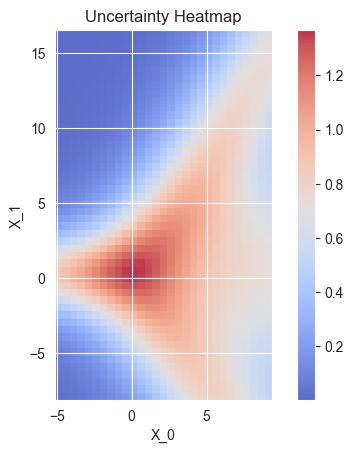

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


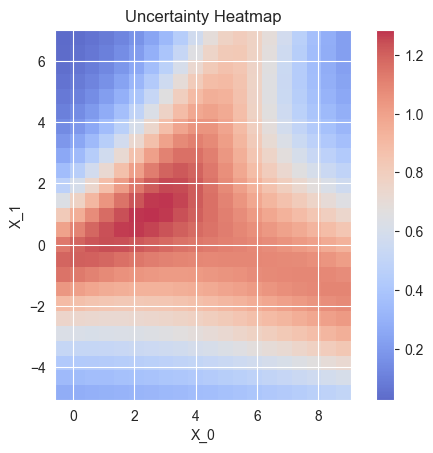

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


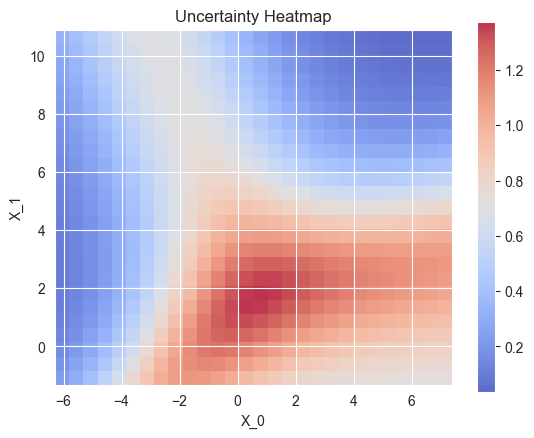

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


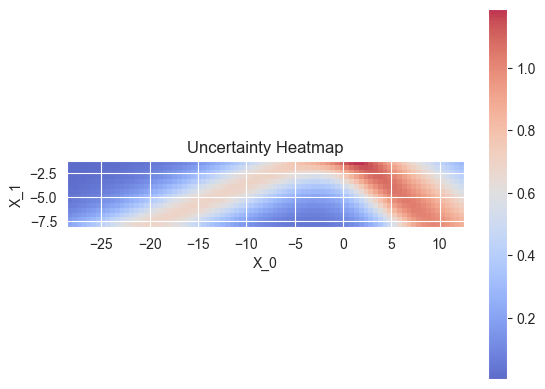

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


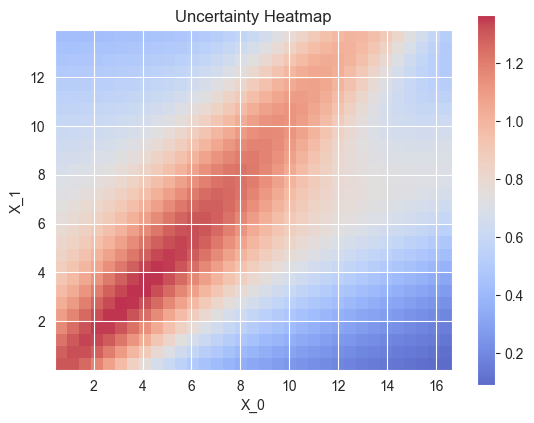

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


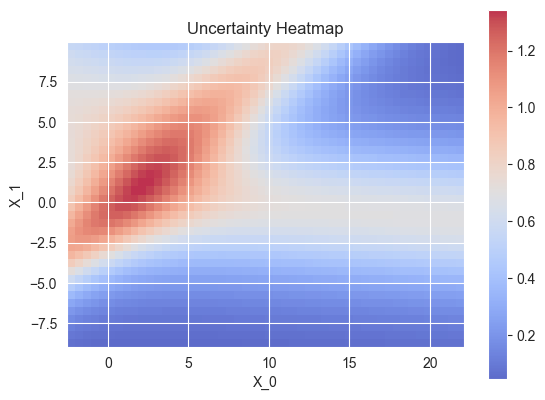

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


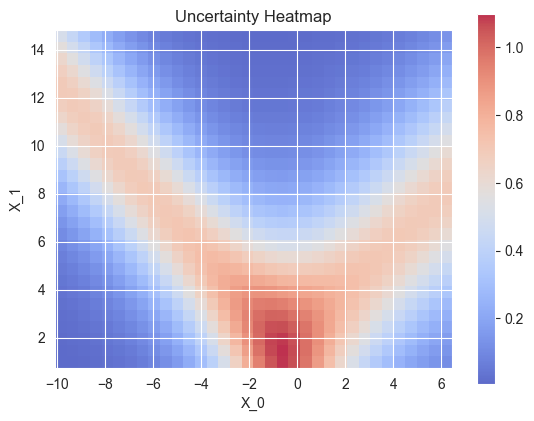

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


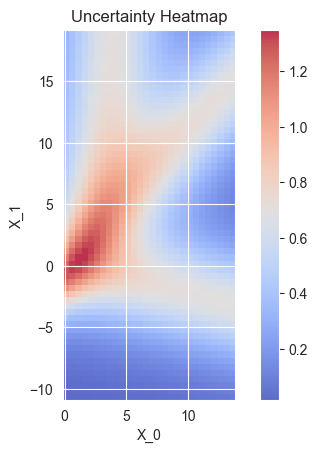

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


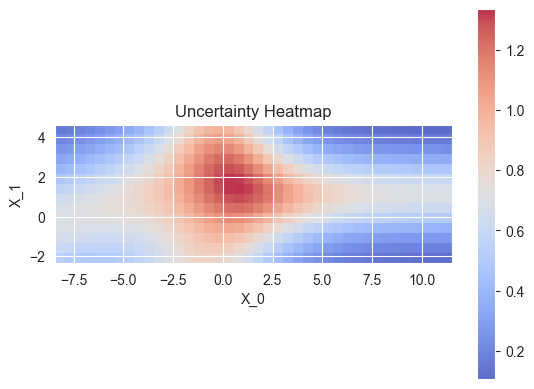

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/master-thesis-experiments-g4j-UPCy-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


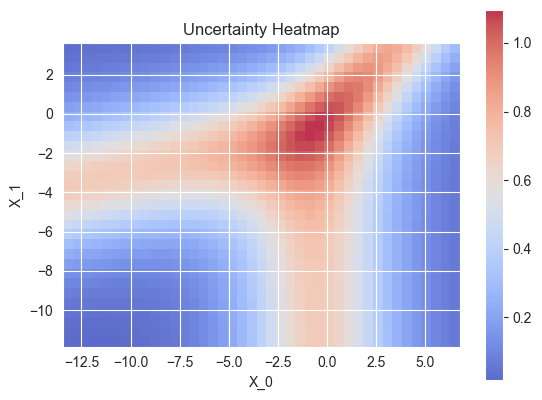

In [11]:
# %%script false --no-raise-error

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import entropy


for (run, concept_list) in concept_list_dict.items():
    for index, concept in enumerate(concept_list):

        if index == len(concept_list) - 1:
            X_train, X_test, y_train, y_test = train_test_split(
                concept[['X_0', 'X_1']],
                concept['y_0'],
                test_size=0.2,
                random_state=42
            )

            clf = LogisticRegression(random_state=42, solver='sag', multi_class='multinomial')
            clf.fit(X_train, y_train)

            resolution = 0.5
            x_min, x_max = concept['X_0'].min() - 0.5, concept['X_0'].max() + 0.5
            y_min, y_max = concept['X_1'].min() - 0.5, concept['X_1'].max() + 0.5
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            input_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X_0', 'X_1'])

            probabilities = clf.predict_proba(input_data)
            uncertainty_scores = np.apply_along_axis(entropy, 1, probabilities)

            uncertainty_map = uncertainty_scores.reshape(xx.shape)

            fig, ax = plt.subplots()

            heatmap = ax.imshow(uncertainty_map, cmap='coolwarm', alpha=0.8, extent=(x_min, x_max, y_min, y_max), origin='lower')
            cbar = fig.colorbar(heatmap)


            ax.set_xlabel('X_0')
            ax.set_ylabel('X_1')
            plt.title('Uncertainty Heatmap')
            plt.show()

### Plot Score Heatmap

In [12]:
# %%script false --no-raise-error

for (run, concept_list) in concept_list_dict.items():
    run_scores = weighted_sampling_scores[run]
    past_dataset = pd.concat(concept_list[:-1], ignore_index=True)
    
    for score in run_scores.values():
        dataset = deepcopy(past_dataset)
        result = dataset.merge(score, left_index=True, right_index=True, how='inner')
        result.drop(columns=['y_0'], inplace=True)
        result.drop(columns=['Unnamed: 0'], inplace=True)
        result.rename(columns={1 : 'score'}, inplace=True)
        
        fig, ax = plt.subplots()

        sc = ax.scatter(result['X_0'], result['X_1'], c=result['score'],  cmap="copper", s=1)
        
        fig.colorbar(sc, ax=ax)
        
        ax.set_aspect("equal")
        
        
        plt.show()
        

### Computing mean and std accuracy

In [13]:
mean_pre_AL_accuracy = np.mean(
    a=list(pre_AL_accuracy.values()),
    axis=0
)
mean_pre_AL_accuracy

0.787

In [14]:
mean_clairvoyant_accuracy = np.mean(
    a=list(clairvoyant_final_accuracy.values()),
    axis=0
)
mean_clairvoyant_accuracy

0.9289999999999999

In [15]:
ws_accuracy = {}
for run in weighted_sampling_accuracy.keys():
    ws_accuracy[run] = []
    for key in weighted_sampling_accuracy[run].keys():
        ws_accuracy[run].append(weighted_sampling_accuracy[run][key])

In [16]:
rs_accuracy = {}
for run in random_sampling_accuracy.keys():
    rs_accuracy[run] = []
    for key in random_sampling_accuracy[run].keys():
        rs_accuracy[run].append(random_sampling_accuracy[run][key])

In [17]:
cl_accuracy = {}
for run in clairvoyant_accuracy.keys():
    cl_accuracy[run] = []
    for key in clairvoyant_accuracy[run].keys():
        cl_accuracy[run].append(clairvoyant_accuracy[run][key])

In [18]:
mean_ws_accuracy = np.mean(a=list(ws_accuracy.values()), axis=0)
mean_rs_accuracy = np.mean(a=list(rs_accuracy.values()), axis=0)
mean_cl_accuracy = np.mean(a=list(cl_accuracy.values()), axis=0)

In [19]:
std_ws_accuracy = np.std(a=list(ws_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
std_rs_accuracy = np.std(a=list(rs_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
std_cl_accuracy = np.std(a=list(cl_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])

### Plot results

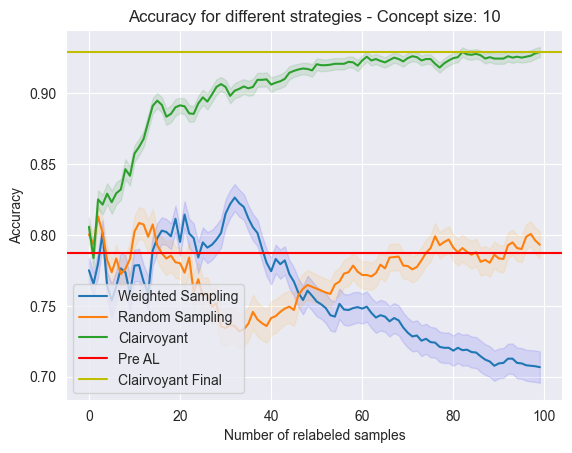

In [20]:
# create a new figure and axis object
fig, ax = plt.subplots()


# plot the accuracy values for each model as a line
ax.plot(range(len(mean_ws_accuracy)), mean_ws_accuracy, label='Weighted Sampling')
ax.plot(range(len(mean_rs_accuracy)), mean_rs_accuracy, label='Random Sampling')
ax.plot(range(len(mean_cl_accuracy)), mean_cl_accuracy, label='Clairvoyant')
ax.fill_between(range(len(mean_ws_accuracy)), mean_ws_accuracy - std_ws_accuracy, mean_ws_accuracy + std_ws_accuracy, color='blue', alpha=0.1)
ax.fill_between(range(len(mean_rs_accuracy)), mean_rs_accuracy - std_rs_accuracy, mean_rs_accuracy + std_rs_accuracy, color='orange', alpha=0.1)
ax.fill_between(range(len(mean_cl_accuracy)), mean_cl_accuracy - std_cl_accuracy, mean_cl_accuracy + std_cl_accuracy, color='green', alpha=0.1)
plt.axhline(y=mean_pre_AL_accuracy, color='r', linestyle='-', label='Pre AL')
plt.axhline(y=mean_clairvoyant_accuracy, color='y', linestyle='-', label='Clairvoyant Final')

# add a legend to the plot
ax.legend()

# set the x-axis label
ax.set_xlabel('Number of relabeled samples')

# set the y-axis label
ax.set_ylabel('Accuracy')

# set the title of the plot
ax.set_title('Accuracy for different strategies - Concept size: ' + str(metadata[runs_dirs[0]]['last_concept_size']))

# display the plot

plt.show()

### Plot Selected Samples

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
unmatched_samples = deepcopy(ws_selected_samples)

In [23]:
for (run, concept_list) in concept_list_dict.items():
    for concept in concept_list:
        unmatched_samples[run] = pd.merge(unmatched_samples[run], concept, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [24]:
# useful to know how many samples have been relabeled with a different label
# from the original one when applying change to the select samples methods
len(unmatched_samples)

10

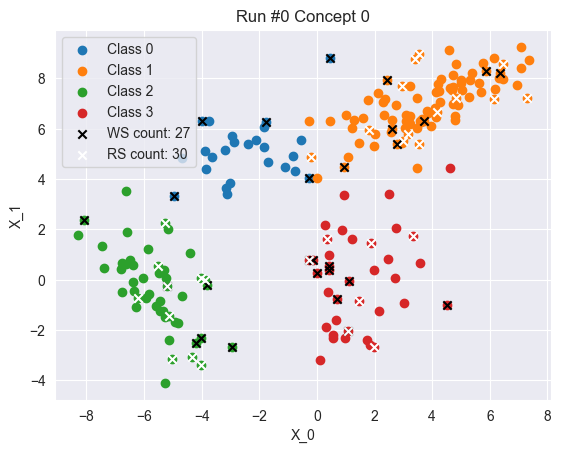

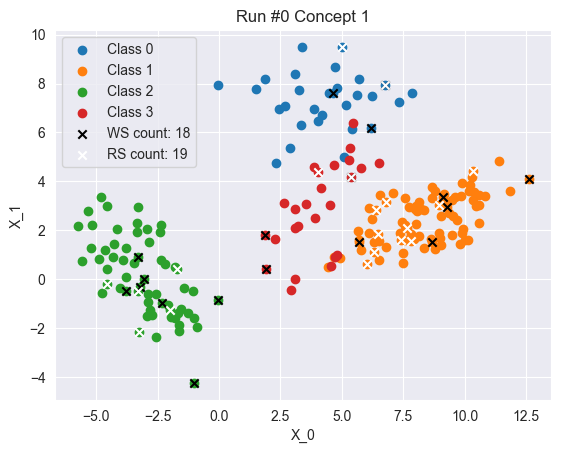

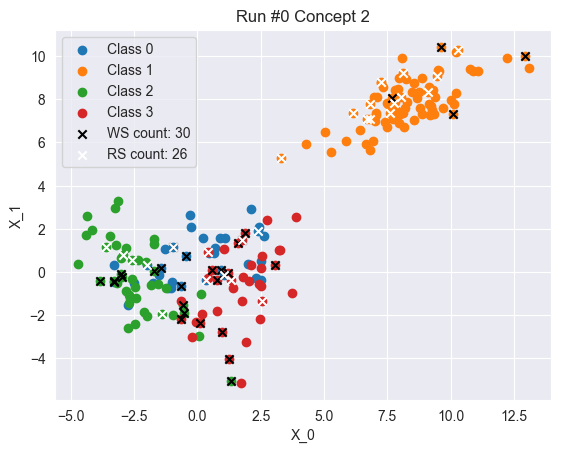

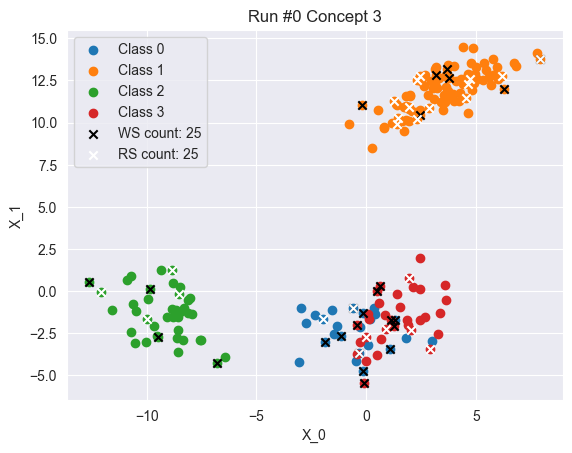

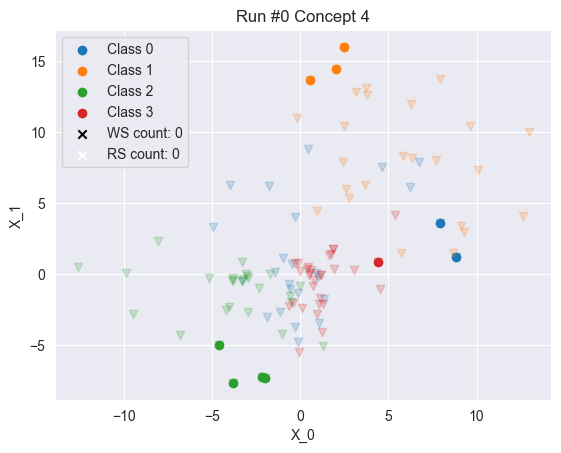

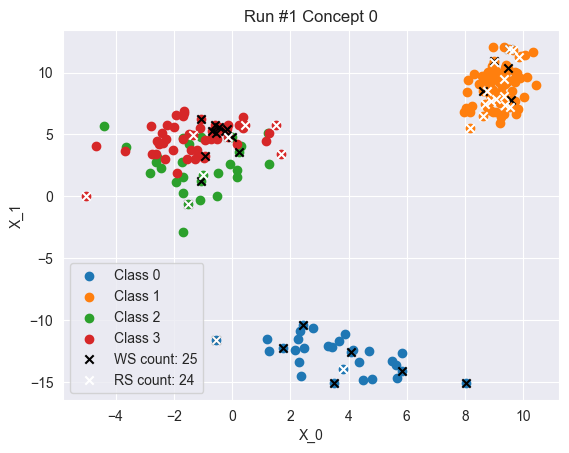

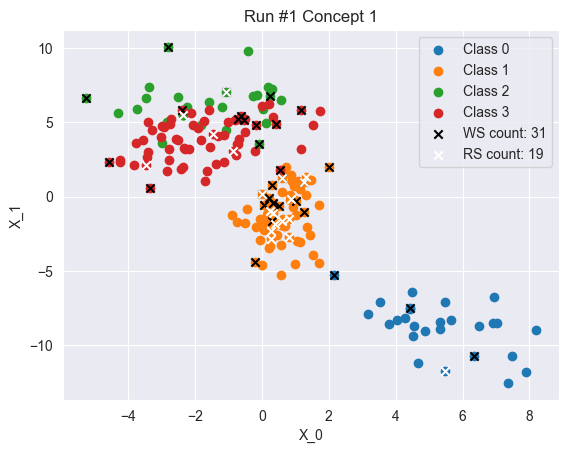

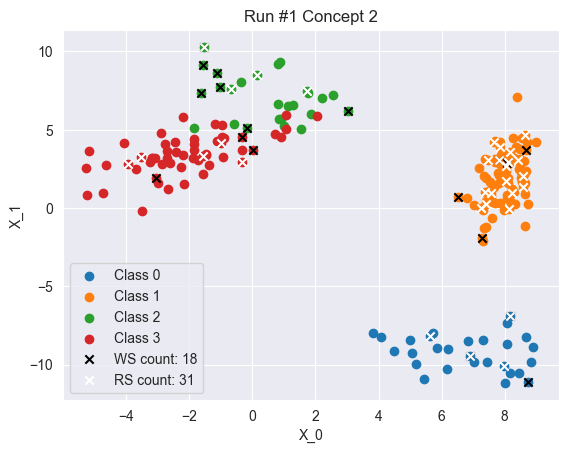

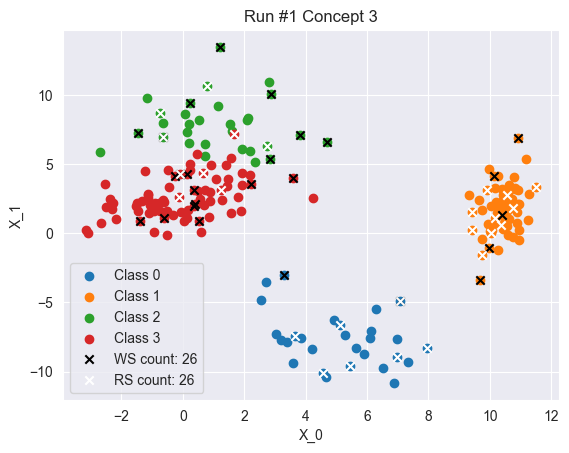

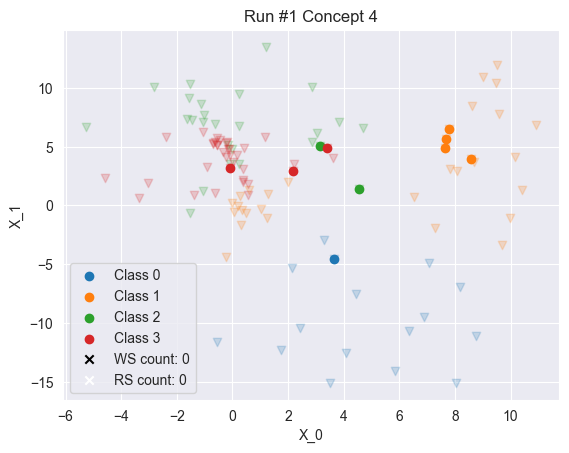

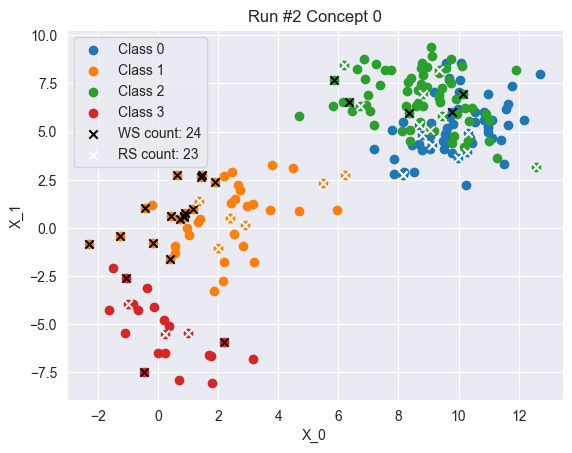

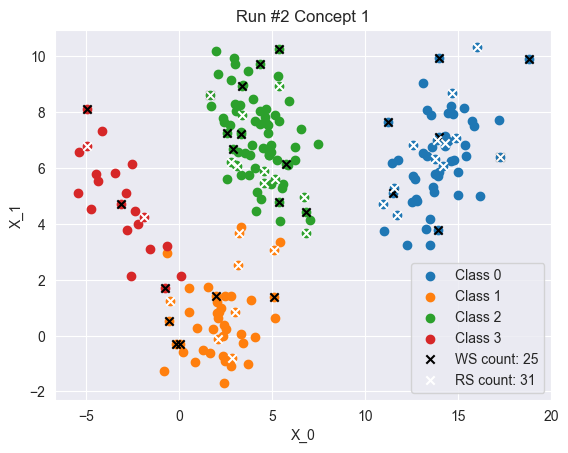

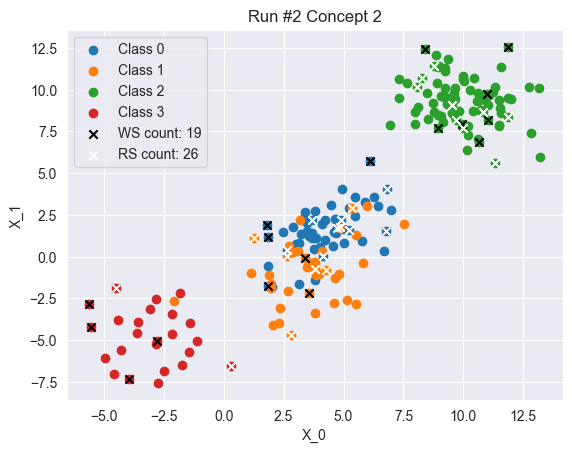

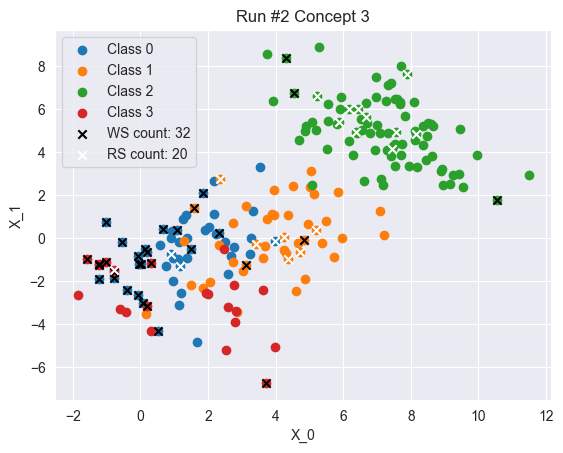

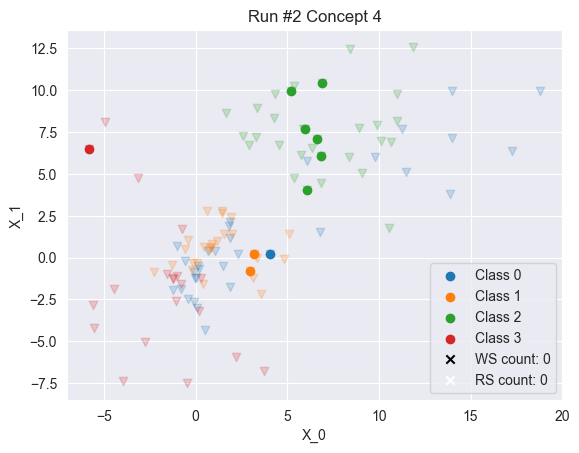

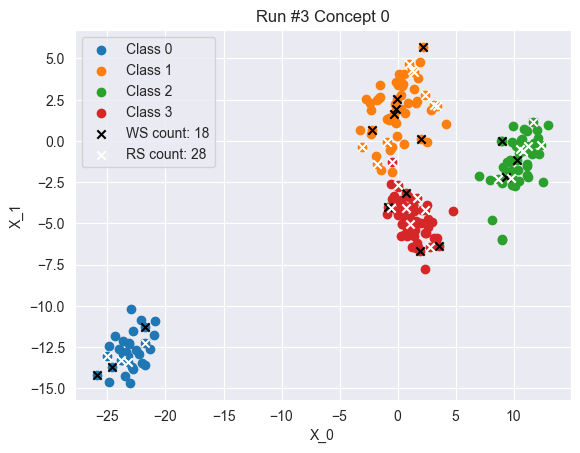

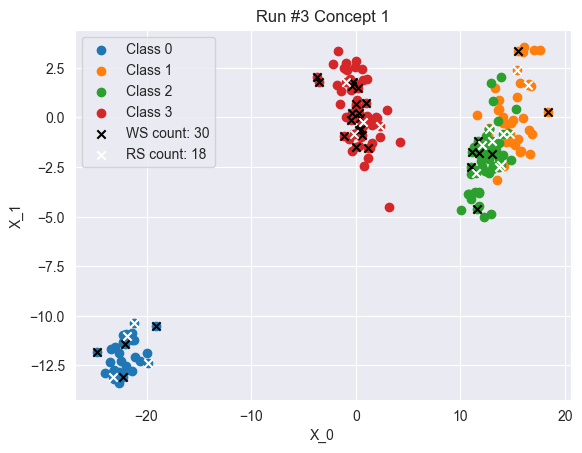

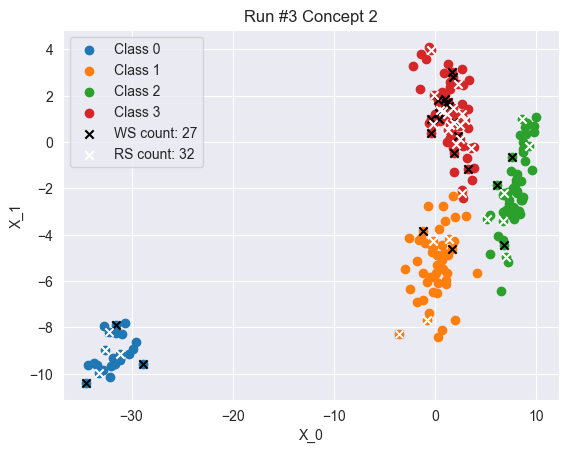

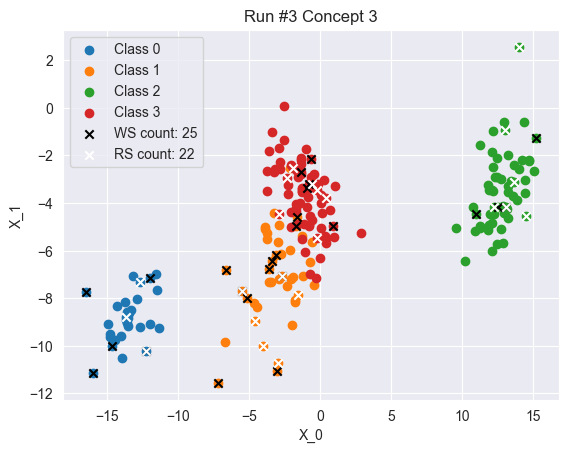

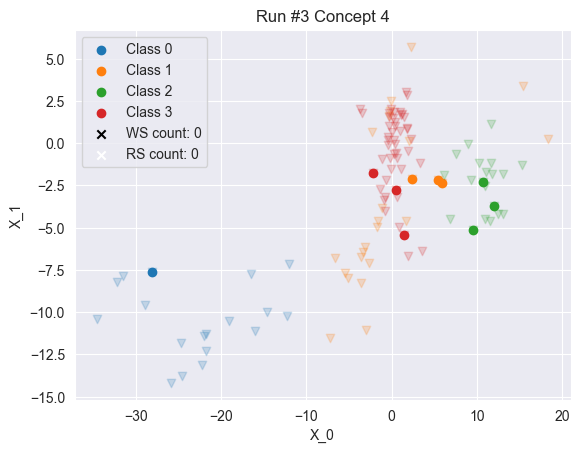

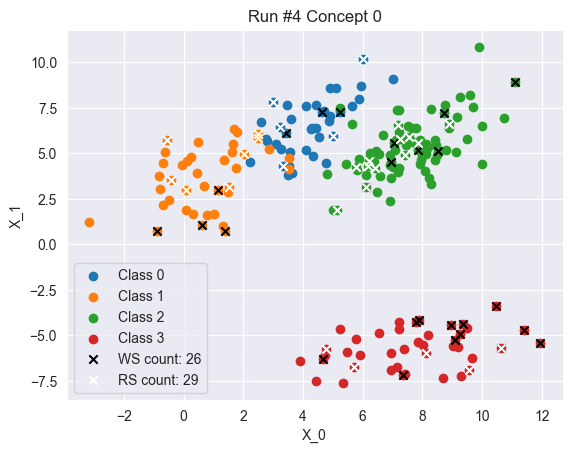

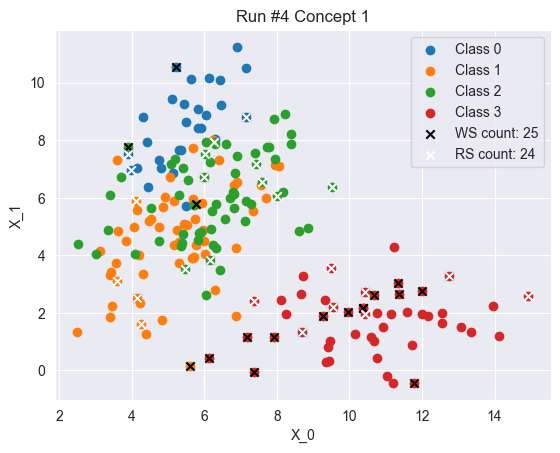

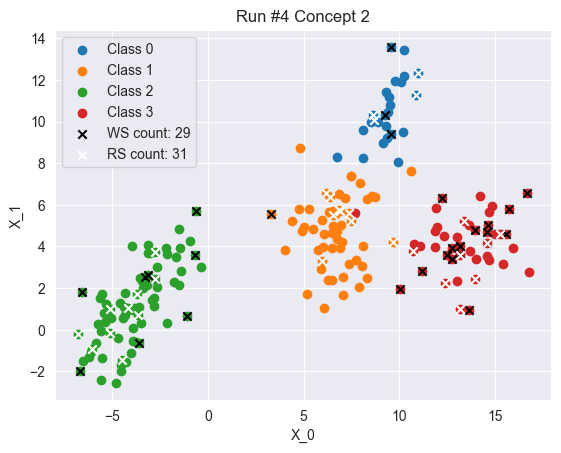

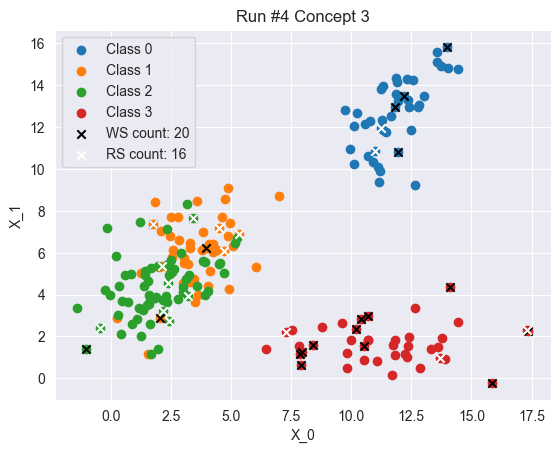

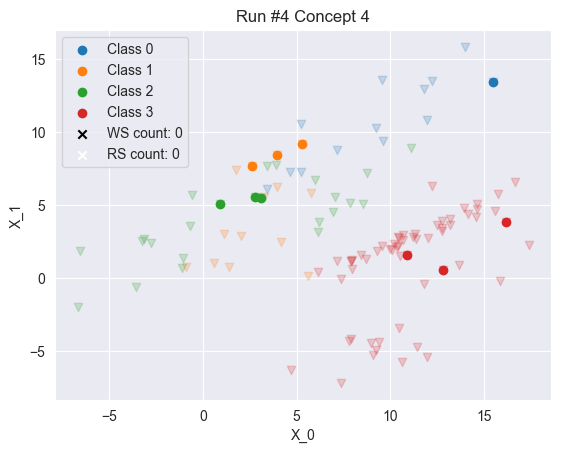

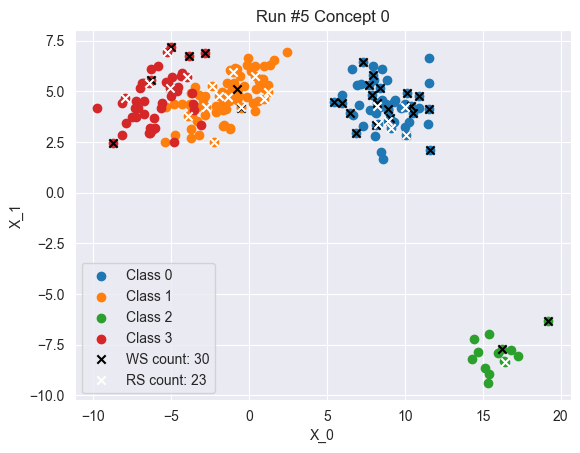

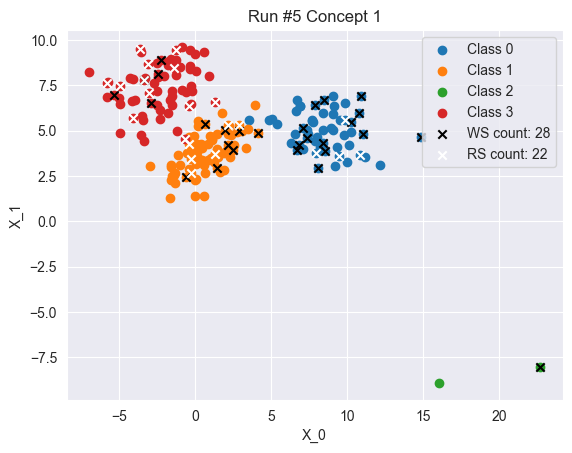

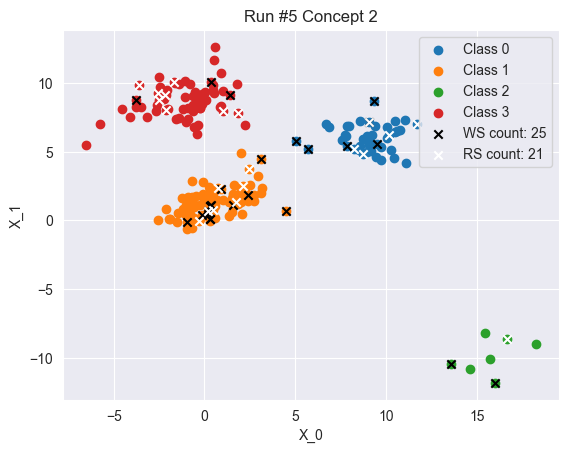

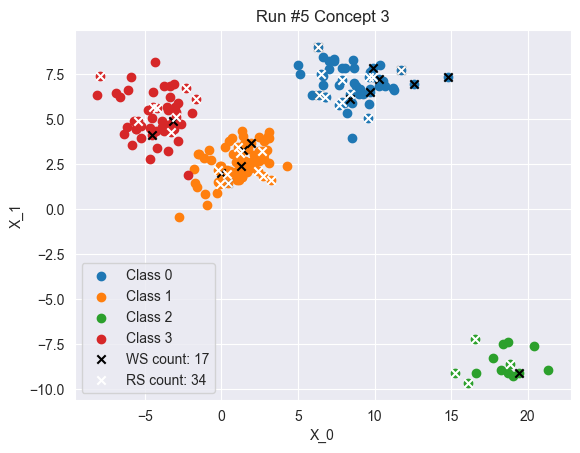

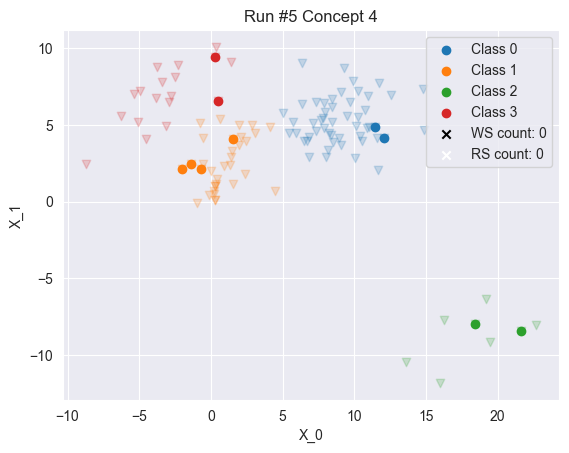

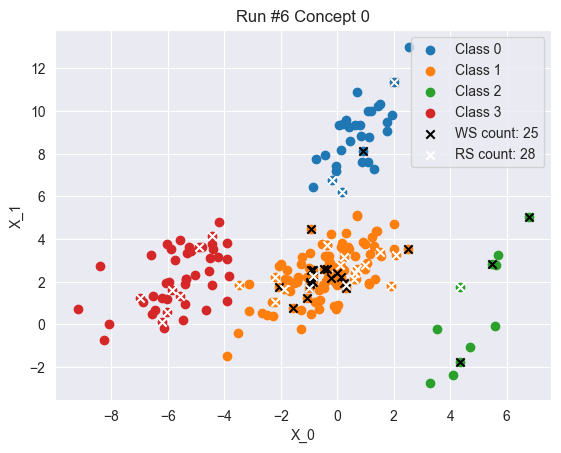

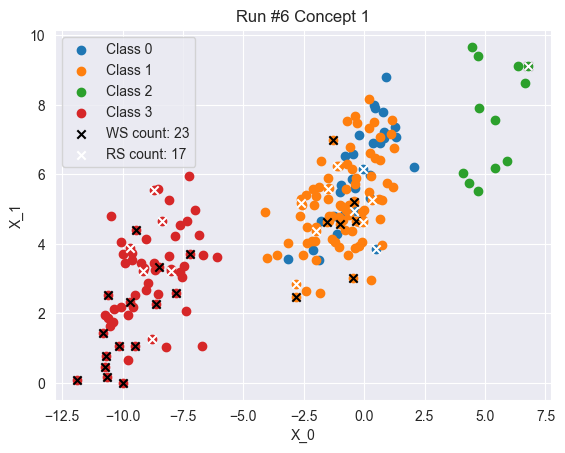

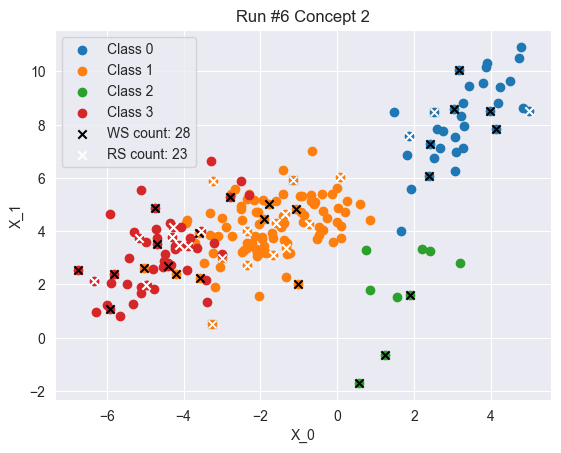

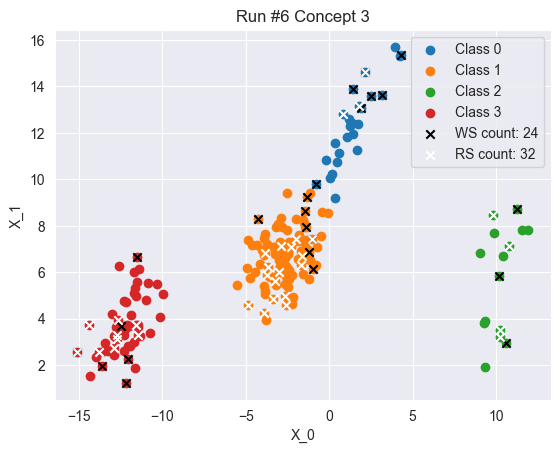

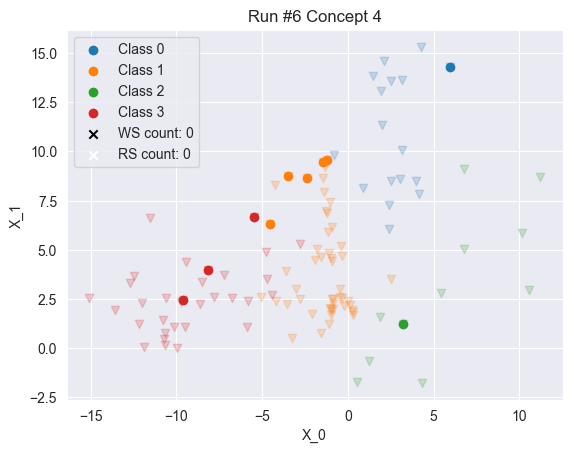

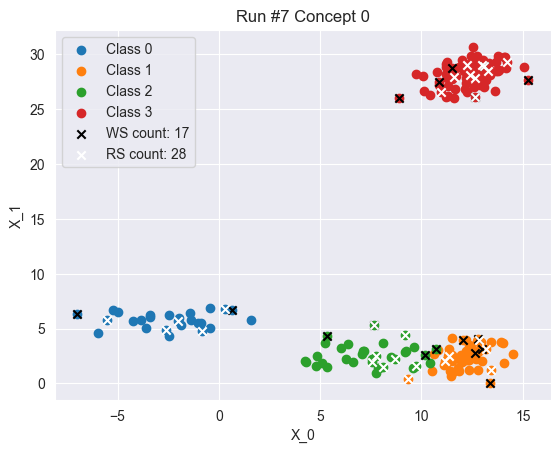

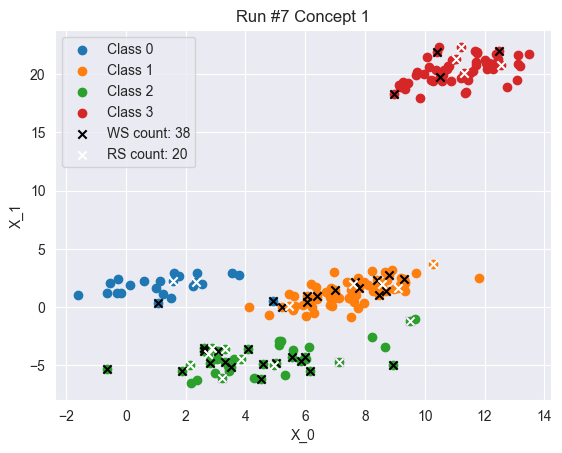

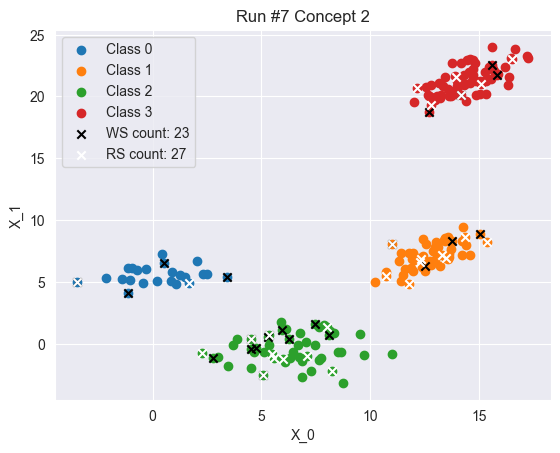

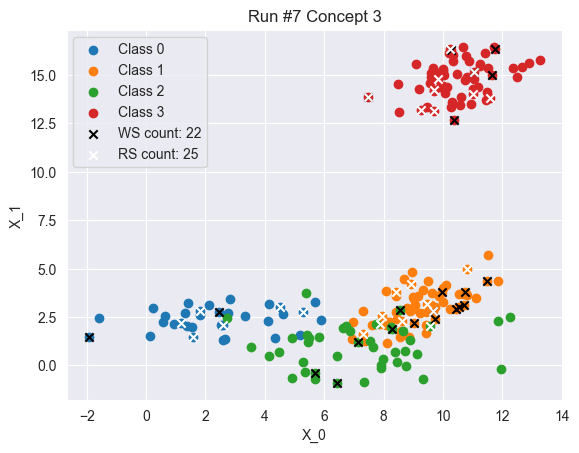

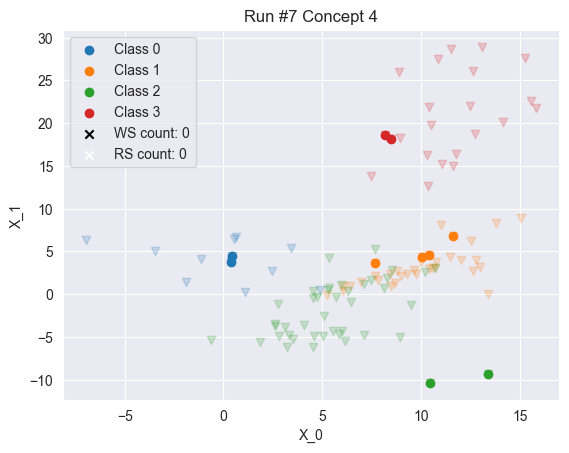

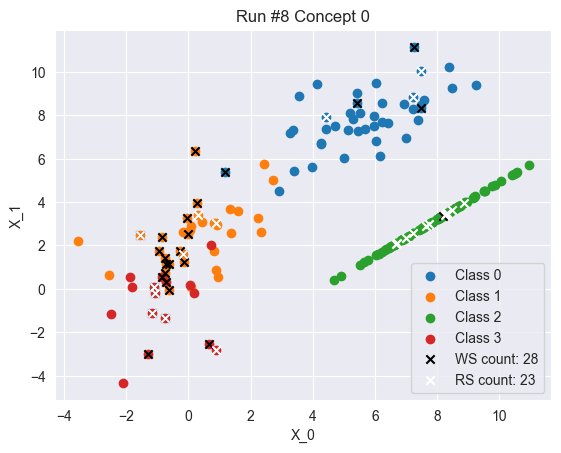

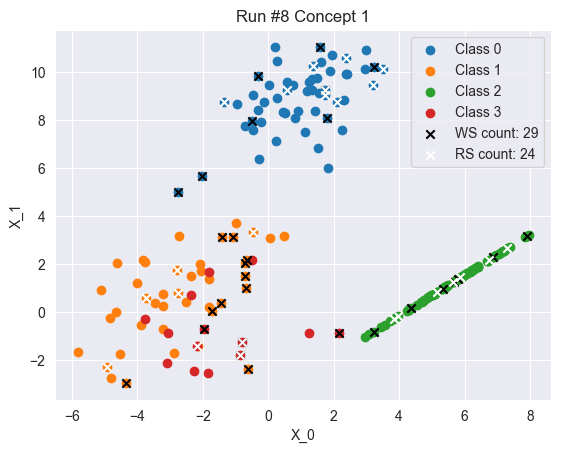

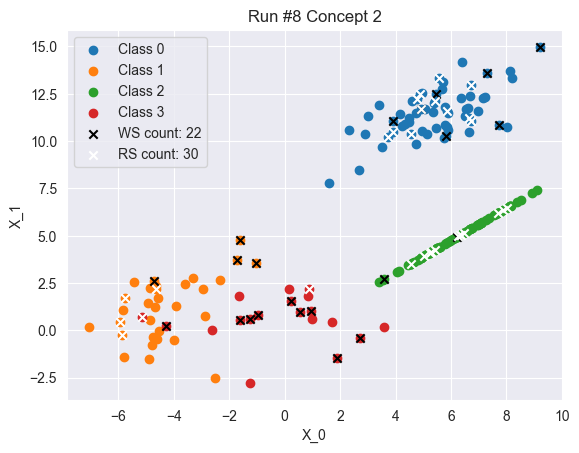

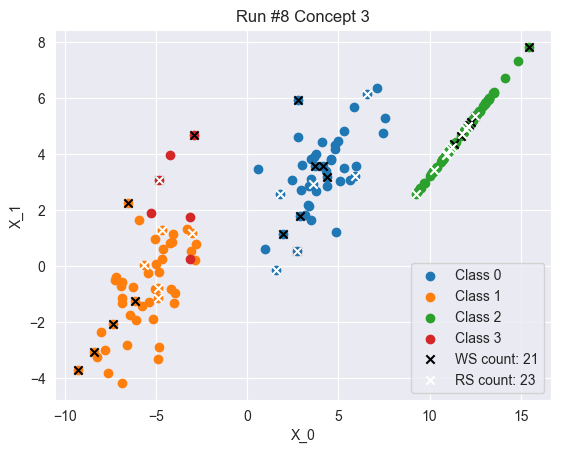

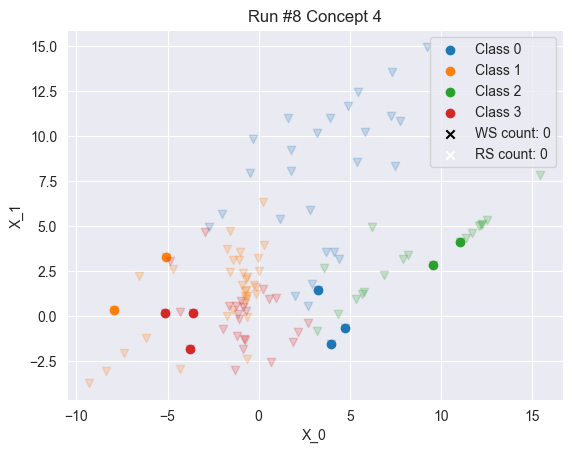

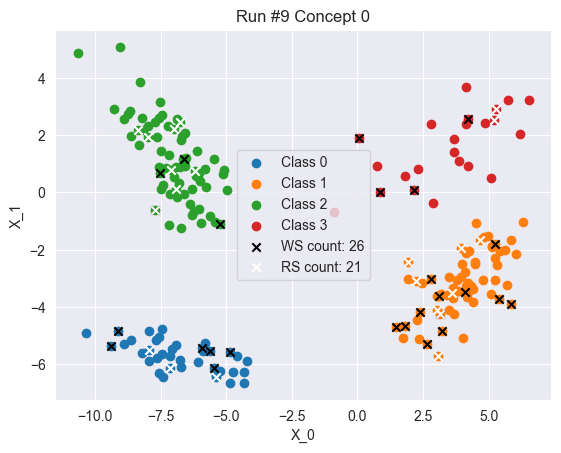

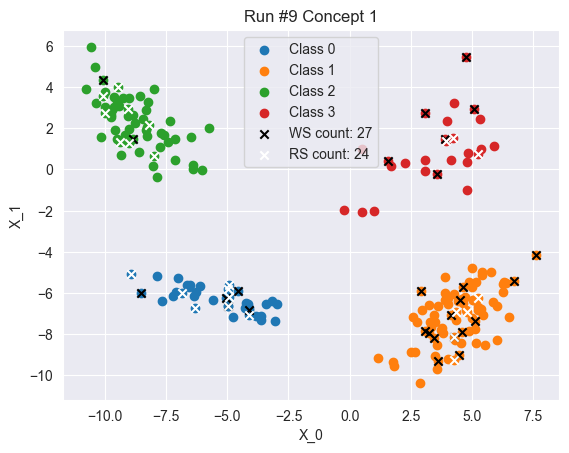

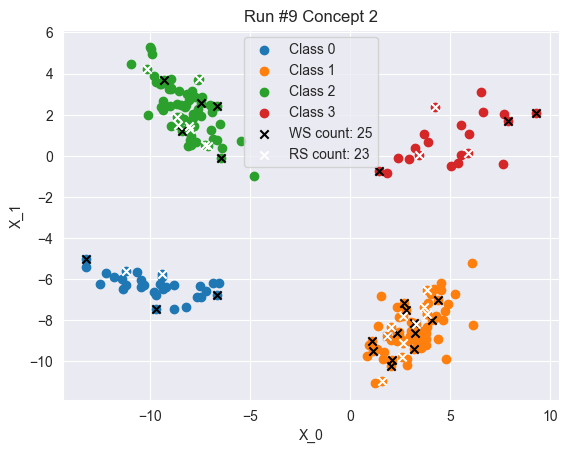

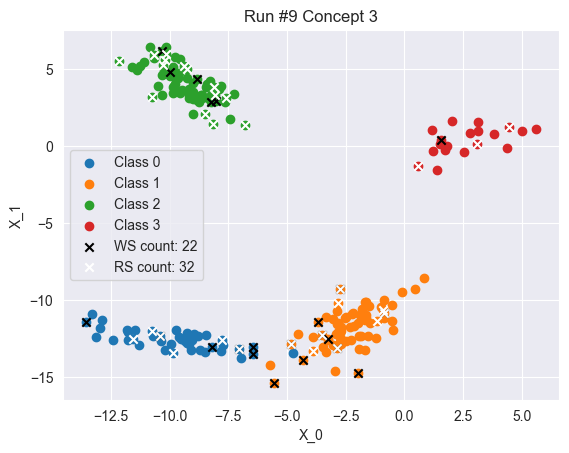

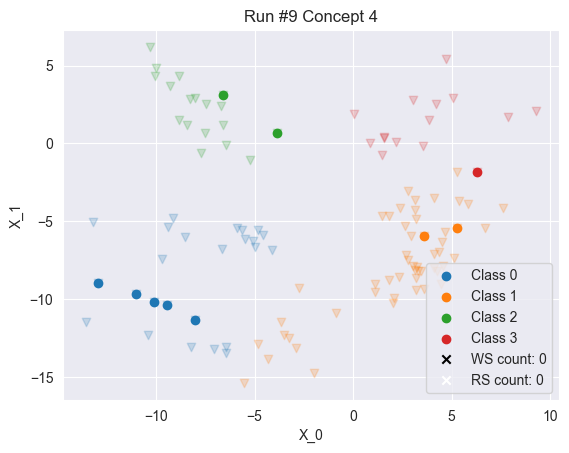

In [25]:
for (run, concept_list) in concept_list_dict.items():
    for index,concept in enumerate(concept_list):
        classes_groups = concept.groupby('y_0')

        selected_samples_ws = pd.merge(concept, ws_selected_samples[run])
        selected_samples_rs = pd.merge(concept, rs_selected_samples[run])

        fig, ax = plt.subplots()
        for i, (label, group) in enumerate(classes_groups):
            ax.scatter(group['X_0'], group['X_1'],
                    label='Class ' + str(int(label)), color=color_list[int(label)])

            if index == len(concept_list) - 1:
                class_samples = ws_selected_samples[run].loc[ws_selected_samples[run]['y_0'] == label]
                selected_samples = pd.concat([group, class_samples], axis=0)
                ax.scatter(selected_samples['X_0'], selected_samples['X_1'], color=color_list[int(label)], alpha=0.2, marker='v')

        plt.scatter(selected_samples_ws['X_0'], selected_samples_ws['X_1'], c='black', marker='x', label='WS count: ' + str(selected_samples_ws.value_counts().count()))
        plt.scatter(selected_samples_rs['X_0'], selected_samples_rs['X_1'], c='white', marker='x', label='RS count: ' + str(selected_samples_rs.value_counts().count()))
        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()

## Master Cell

In [26]:
from itertools import product

gammas_handler = [0.1, 0.2, 0.3]
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.1, 0.2, 0.3, 0.4, 0.5]

for gamma_handler, alpha, gamma in product(gammas_handler, alphas, gammas):

    # build simulation path
    sim_path = '../../results/synth_classification_fixed_dataset_and_samples_v2/22-07-2023-14:12_gamma_handler:' + str(gamma_handler) + '-alpha:' + str(alpha) + '-gamma:' + str(gamma)

    # get run dirs
    runs_dirs = get_immediate_subdirectories(sim_path)
    runs_dirs.sort()

    # load data
    pre_AL_accuracy, clairvoyant_final_accuracy, concept_list_dict, test_set, weights, metadata, weighted_sampling_accuracy, random_sampling_accuracy, clairvoyant_accuracy, ws_selected_samples, rs_selected_samples = load_data(runs_dirs)

    # compute means and stds
    mean_pre_AL_accuracy = np.mean(
    a=list(pre_AL_accuracy.values()),
    axis=0
    )

    mean_clairvoyant_accuracy = np.mean(
    a=list(clairvoyant_final_accuracy.values()),
    axis=0
    )

    ws_accuracy = {}
    for run in weighted_sampling_accuracy.keys():
        ws_accuracy[run] = []
        for key in weighted_sampling_accuracy[run].keys():
            ws_accuracy[run].append(weighted_sampling_accuracy[run][key])
    rs_accuracy = {}
    for run in random_sampling_accuracy.keys():
        rs_accuracy[run] = []
        for key in random_sampling_accuracy[run].keys():
            rs_accuracy[run].append(random_sampling_accuracy[run][key])
    cl_accuracy = {}
    for run in clairvoyant_accuracy.keys():
        cl_accuracy[run] = []
        for key in clairvoyant_accuracy[run].keys():
            cl_accuracy[run].append(clairvoyant_accuracy[run][key])

    mean_ws_accuracy = np.mean(a=list(ws_accuracy.values()), axis=0)
    mean_rs_accuracy = np.mean(a=list(rs_accuracy.values()), axis=0)
    mean_cl_accuracy = np.mean(a=list(cl_accuracy.values()), axis=0)

    std_ws_accuracy = np.std(a=list(ws_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
    std_rs_accuracy = np.std(a=list(rs_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
    std_cl_accuracy = np.std(a=list(cl_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])


    # plot results
    fig, ax = plt.subplots()


    # plot the accuracy values for each model as a line
    ax.plot(range(len(mean_ws_accuracy)), mean_ws_accuracy, label='Weighted Sampling')
    ax.plot(range(len(mean_rs_accuracy)), mean_rs_accuracy, label='Random Sampling')
    ax.plot(range(len(mean_cl_accuracy)), mean_cl_accuracy, label='Clairvoyant')
    ax.fill_between(range(len(mean_ws_accuracy)), mean_ws_accuracy - std_ws_accuracy, mean_ws_accuracy + std_ws_accuracy, color='blue', alpha=0.1)
    ax.fill_between(range(len(mean_rs_accuracy)), mean_rs_accuracy - std_rs_accuracy, mean_rs_accuracy + std_rs_accuracy, color='orange', alpha=0.1)
    ax.fill_between(range(len(mean_cl_accuracy)), mean_cl_accuracy - std_cl_accuracy, mean_cl_accuracy + std_cl_accuracy, color='green', alpha=0.1)
    plt.axhline(y=mean_pre_AL_accuracy, color='r', linestyle='-', label='Pre AL')
    plt.axhline(y=mean_clairvoyant_accuracy, color='y', linestyle='-', label='Clairvoyant Final')

    # add a legend to the plot
    ax.legend()

    # set the x-axis label
    ax.set_xlabel('Number of relabeled samples')

    # set the y-axis label
    ax.set_ylabel('Accuracy')

    # set the title of the plot
    ax.set_title('Accuracy for different strategies - Concept size: ' + str(metadata[runs_dirs[0]]['last_concept_size']))

    # display the plot

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../results/synth_classification_fixed_dataset_and_samples_v2/22-07-2023-14:12_gamma_handler:0.1-alpha:0.1-gamma:0.1'

In [ ]:
from scipy.io import arff
import pandas as pd


data = arff.loadarff('/Users/massimilianoarca/Downloads/usenet-three.arff')
df = pd.DataFrame(data[0])

print(df.head())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a C-shaped dataset using make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)

# Manipulate the data to create a C-shape
X_c_shaped = X_moons
y_c_shaped = y_moons

# Plot the C-shaped dataset
plt.scatter(X_c_shaped[y_c_shaped == 0][:, 0], X_c_shaped[y_c_shaped == 0][:, 1], c='r', label='Class 0')
plt.scatter(X_c_shaped[y_c_shaped == 1][:, 0], X_c_shaped[y_c_shaped == 1][:, 1], c='b', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('C-Shaped Dataset')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import make_classification
import seaborn as sns

X,y = make_classification(
    n_samples=10000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=2,
    flip_y=0,
    weights=[0.3,0.7],
    random_state=17
)

sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()


In [ ]:
from sklearn.datasets import make_circles

X_circles, y_circles = make_circles(n_samples=1000, noise=0.15, factor=0.9, random_state=42)

# Split circles into semicircles and assign class labels
X_semicircles = np.copy(X_circles)
y_semicircles = np.zeros(X_circles.shape[0], dtype=int)

# Identify and label the upper semicircle
upper_half = X_semicircles[:, 1] > 0

theta = np.pi / 4
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

y_semicircles[upper_half] = 1

# Create class labels for the lower semicircle (class 2)
y_semicircles[~upper_half] = 2

# Generate a third class for the remaining data points
y_semicircles[~upper_half & (X_semicircles[:, 0] > 0)] = 3

X_semicircles[upper_half] = (rot_matrix @ X_semicircles[upper_half].T).T

theta = np.pi / 2
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

X_semicircles[~upper_half & (X_semicircles[:, 0] > 0)] = X_semicircles[~upper_half & (X_semicircles[:, 0] > 0)] + [0, 1.0]
X_semicircles[~upper_half & (X_semicircles[:, 0] <= 0)] = X_semicircles[~upper_half & (X_semicircles[:, 0] <= 0)] + [0.5, 0]

# Visualize the generated semicircles
import matplotlib.pyplot as plt

plt.scatter(X_semicircles[y_semicircles == 1][:, 0], X_semicircles[y_semicircles == 1][:, 1], label='Class 1')
plt.scatter(X_semicircles[y_semicircles == 2][:, 0], X_semicircles[y_semicircles == 2][:, 1], label='Class 2')
plt.scatter(X_semicircles[y_semicircles == 3][:, 0], X_semicircles[y_semicircles == 3][:, 1], label='Class 3')
plt.legend()
plt.title('Multiclass Classification with Semicircles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_circles

def generate_multiclass_spirals(n_samples, n_classes, noise=0.1, factor=0.5, rotation_range=np.pi/4, shift_range=0.5, random_state=None):
    X_circles, _ = make_circles(n_samples=n_samples, noise=noise, factor=factor, random_state=random_state)
    
    # Calculate the polar coordinates
    radius = np.sqrt(X_circles[:, 0]**2 + X_circles[:, 1]**2)
    angle = np.arctan2(X_circles[:, 1], X_circles[:, 0])
    
    # Divide the angle range into segments for each class
    angle_segments = np.linspace(-np.pi, np.pi, n_classes + 1)
    
    X_multiclass = np.zeros_like(X_circles)
    
    # Assign class labels based on the angle segments
    y = np.zeros(X_circles.shape[0], dtype=int)
    for i in range(n_classes):
        mask = np.logical_and(angle >= angle_segments[i], angle < angle_segments[i + 1])
        y[mask] = i
        
        class_points = X_circles[mask]
        
        # Apply random rotation and shift
        random_rotation = np.random.uniform(-rotation_range, rotation_range)
        random_shift_x = np.random.uniform(-shift_range, shift_range)
        random_shift_y = np.random.uniform(-shift_range, shift_range)
        
        # Rotate and shift the points
        rotated_points = class_points.dot(np.array([[np.cos(random_rotation), -np.sin(random_rotation)], [np.sin(random_rotation), np.cos(random_rotation)]]))
        shifted_points = rotated_points + np.array([random_shift_x, random_shift_y])
        
        X_multiclass[mask] = shifted_points
    
    return X_multiclass, y

n_samples = 1000
n_classes = 3  # Change this to the desired number of classes
noise = 0.1
factor = 0.9
rotation_range = np.pi / 2
shift_range = 0.5
random_state = 42

X_multiclass, y_multiclass = generate_multiclass_spirals(n_samples, n_classes, noise, factor, rotation_range, shift_range, random_state)

# Visualize the generated multiclass dataset
import matplotlib.pyplot as plt

for class_label in range(n_classes):
    plt.scatter(X_multiclass[y_multiclass == class_label][:, 0], X_multiclass[y_multiclass == class_label][:, 1], label=f'Class {class_label}')
    
plt.legend()
plt.title(f'Multiclass Classification with {n_classes} Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_circles

def generate_multiclass_spirals(n_samples, n_classes, noise=0.1, factor=0.5, shift_range=0.2, rotation_range=np.pi/4, random_state=None):
    X_circles, _ = make_circles(n_samples=n_samples, noise=noise, factor=factor, random_state=random_state)
    
    # Calculate the polar coordinates
    radius = np.sqrt(X_circles[:, 0]**2 + X_circles[:, 1]**2)
    angle = np.arctan2(X_circles[:, 1], X_circles[:, 0])
    
    # Divide the angle range into segments for each class
    angle_segments = np.linspace(-np.pi, np.pi, n_classes + 1)
    
    # Initialize the rotated and shifted data
    X_multiclass = np.zeros_like(X_circles)
    
    # Initialize lists to store distribution information
    shift_info = []
    rotation_info = []
    
    # Generate rotated and shifted versions of each class
    for i in range(n_classes):
        mask = np.logical_and(angle >= angle_segments[i], angle < angle_segments[i + 1])
        class_points = X_circles[mask]
        
        # Apply random rotation and shift
        random_rotation = np.random.uniform(-rotation_range, rotation_range)
        random_shift_x = np.random.uniform(-shift_range, shift_range)
        random_shift_y = np.random.uniform(-shift_range, shift_range)
        
        # Store shift and rotation information
        shift_info.append((random_shift_x, random_shift_y))
        rotation_info.append(random_rotation)
        
        # Rotate and shift the points
        rotated_points = class_points.dot(np.array([[np.cos(random_rotation), -np.sin(random_rotation)], [np.sin(random_rotation), np.cos(random_rotation)]]))
        shifted_points = rotated_points + np.array([random_shift_x, random_shift_y])
        
        X_multiclass[mask] = shifted_points
    
    # Generate class labels
    y_multiclass = np.repeat(np.arange(n_classes), n_samples // n_classes)
    
    return X_multiclass, y_multiclass, shift_info, rotation_info

n_samples = 1000
n_classes = 5  # Change this to the desired number of classes
noise = 0.1
factor = 0.9
shift_range = 0.5
rotation_range = np.pi / 2  # Adjust the rotation range as desired
random_state = 42

X_multiclass, y_multiclass, shift_info, rotation_info = generate_multiclass_spirals(n_samples, n_classes, noise, factor, shift_range, rotation_range, random_state)

# Print distribution information for each class
for class_label in range(n_classes):
    print(f"Class {class_label}:")
    print("Shift Info:", shift_info[class_label])
    print("Rotation Info:", rotation_info[class_label])
    print()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from scipy.stats import gaussian_kde

def plot_kde_estimate(data, label):
    kde = gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 1000)
    plt.plot(x_vals, kde(x_vals), label=f'Class {label} KDE')

n_samples = 1000
n_classes = 5
noise = 0.1
factor = 0.5
shift_range = 0.2
rotation_range = np.pi / 6
random_state = 42

X_multiclass, y_multiclass, _, _ = generate_multiclass_spirals(n_samples, n_classes, noise, factor, shift_range, rotation_range, random_state)

# Estimate and plot the distribution for each class using KDE
for class_label in range(n_classes):
    class_data = X_multiclass[y_multiclass == class_label][:, 0]  # Use the desired feature for estimation
    plot_kde_estimate(class_data, class_label)

plt.legend()
plt.title(f'Distribution Estimation for {n_classes} Classes')
plt.xlabel('Feature 1')
plt.ylabel('Density')
plt.show()


In [ ]:
import random


def make_many_moons(
    number_of_moons,
    sigma, 
    radius, 
    number_of_datapoints,
    rotation_range=np.pi,
    shift_range=0.5
):
    
    moons = []
    for y in range(number_of_moons):
        q = np.random.uniform(0,np.pi,size=number_of_datapoints)
        factor = random.choice([1,-1])
            
        random_rotation = np.random.uniform(-rotation_range, rotation_range)
        random_shift_x = np.random.uniform(-shift_range, shift_range)
        random_shift_y = np.random.uniform(-shift_range, shift_range)
        
        moon = np.zeros((number_of_datapoints, 3))
        moon[:,0] = (radius * np.cos(q)) + random_shift_x
        moon[:,1] = (radius * np.sin(q) * factor) +  random_shift_y
        # moon[:, :-1] = moon[:, :-1].dot(
        #     np.array([[np.cos(random_rotation), -np.sin(random_rotation)],
        #          [np.sin(random_rotation), np.cos(random_rotation)]])
        # )
        moon[:,2] = y
        moons.append(moon)
        noise = np.random.normal(0, sigma, size=moon[:,:2].shape)
        moon[:,:2] += noise
    moons = np.concatenate(moons)
    return moons[:,:2], moons[:,2]


X, y = make_many_moons(
    number_of_moons=3,
    sigma=0.1, 
    radius=1, 
    number_of_datapoints=100,
    rotation_range=np.pi,
    shift_range=1.0)

plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
from master_thesis_experiments.simulator_toolbox.generator.synth_classification_generator_v2 import SynthClassificationGeneratorV2
import matplotlib.pyplot as plt

generator = SynthClassificationGeneratorV2(
    n_features=2,
    n_outputs=1,
    n_classes=3
)

generator.radius_values = [1, 1.2, 0.5]
generator.centers = [[0, 0], [0.5, 0.5], [1, 1]]
generator.prior_probs = [0.2, 0.3, 0.5]
generator.factors = [1, -1, -1]
generator.noises = [0.1, 0.2, 0.2]

df = generator.generate(1000)

plt.scatter(df['X_0'], df['X_1'], c=df['y_0'])